# LIBRERIAS

In [1]:
%pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, Dropdown, HTML, Text, VBox, HBox, Layout
from IPython.display import display
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.base import clone
from sklearn.dummy import DummyRegressor
from sklearn.metrics import make_scorer
from scipy.stats import spearmanr
from optuna.samplers import TPESampler
import optuna
import os, json, joblib, sys, platform, time
from datetime import datetime
import warnings
import streamlit as st

In [6]:
import sys
print("Kernel Python:", sys.executable)

# instala/actualiza pip y xgboost en ESTE kernel
!{sys.executable} -m pip install -U pip
!{sys.executable} -m pip install -U xgboost

# verifica
!{sys.executable} -m pip show xgboost

Kernel Python: c:\Users\USUARIO\anaconda3\python.exe
Name: xgboost
Version: 3.0.5
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: c:\Users\USUARIO\anaconda3\Lib\site-packages
Requires: numpy, scipy
Required-by: 


In [7]:
import importlib, diccionario
importlib.reload(diccionario)  # por si quedó en caché

print('¿Está diccionario_variables?:', hasattr(diccionario, 'diccionario_variables'))
print([n for n in dir(diccionario) if not n.startswith('_')][:20])

¿Está diccionario_variables?: True
['cargar_diccionario', 'diccionario_variables', 'math', 'pd', 're', 'reglas_por_parametro']


In [8]:
import importlib, diccionario
importlib.reload(diccionario)
len(diccionario.diccionario_variables), len(diccionario.reglas_por_parametro)


(53, 53)

In [9]:
df = pd.read_csv('Calidad_del_agua_del_Rio_Cauca.csv', sep=';')

df.head()

,FECHA DE MUESTREO,ESTACIONES,pH,TEMPERATURA (°C),COLOR (UPC),TURBIEDAD (UNT),SOLIDOS TOTALES (mg SST/l),SOLIDOS SUSPENDIDOS TOTALES (mg SS/l),SOLIDOS DISUELTOS (mg SD/l),DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),...,CROMO TOTAL (mg Cr/l),CROMO DISUELTO (mg Cr/l),NIQUEL TOTAL (mg Ni/l),NIQUEL DISUELTO (mg Ni/l),PLOMO TOTAL (mg Pb/l),PLOMO DISUELTO (mg Pb/l),MERCURIO (µg Hg/l),COLIFORMES TOTALES (NMP/100 ml),COLIFORMES FECALES (NMP/100 ml),CAUDAL (m3/s)
0,12/19/1998 12:00:00 AM,YOTOCO,7.1,4.1,NaN,4.1,NaN,110,NaN,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12/19/1998 12:00:00 AM,MEDIACANOA,7,2,NaN,2,NaN,130,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12/19/1998 12:00:00 AM,PASO DE LA TORRE,7,22.9,NaN,3.4,NaN,153.3,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5/09/1990 0:00,ANTES SUAREZ,6.6,NaN,NaN,NaN,157.0,29.3,127.7,0.5,...,NaN,NaN,0,NaN,NaN,NaN,NaN,2.4*10E4,23,NaN
4,1/10/1990 0:00,ANTES RIO OVEJAS,6.7,NaN,NaN,NaN,143.0,65,78,2.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4*10E4,24*10E4,NaN


In [10]:
df_sin_columnas = df.drop(columns=['FECHA DE MUESTREO', 'ESTACIONES'])
df_sin_columnas.head()

,pH,TEMPERATURA (°C),COLOR (UPC),TURBIEDAD (UNT),SOLIDOS TOTALES (mg SST/l),SOLIDOS SUSPENDIDOS TOTALES (mg SS/l),SOLIDOS DISUELTOS (mg SD/l),DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),DEMANDA QUIMICA DE OXIGENO (mg O2/l),OXIGENO DISUELTO (mg O2/l),...,CROMO TOTAL (mg Cr/l),CROMO DISUELTO (mg Cr/l),NIQUEL TOTAL (mg Ni/l),NIQUEL DISUELTO (mg Ni/l),PLOMO TOTAL (mg Pb/l),PLOMO DISUELTO (mg Pb/l),MERCURIO (µg Hg/l),COLIFORMES TOTALES (NMP/100 ml),COLIFORMES FECALES (NMP/100 ml),CAUDAL (m3/s)
0,7.1,4.1,NaN,4.1,NaN,110,NaN,4.2,NaN,1.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,2,NaN,2,NaN,130,NaN,3,NaN,1.81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,22.9,NaN,3.4,NaN,153.3,NaN,5,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.6,NaN,NaN,NaN,157.0,29.3,127.7,0.5,5.2,5.6,...,NaN,NaN,0,NaN,NaN,NaN,NaN,2.4*10E4,23,NaN
4,6.7,NaN,NaN,NaN,143.0,65,78,2.1,24,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4*10E4,24*10E4,NaN


In [11]:
# Visor de diccionario (Excel)

import math, re
import pandas as pd
from ipywidgets import Text, Dropdown, HTML, VBox, HBox, Layout
from IPython.display import display

# parseo de rangos con inclusividad
def _parse_bands(cell: str):
    """
    Devuelve lista de dicts con límites e inclusividad.
    Soporta: 'a - b' (ambos inclusivos), '> a', '≥ a', '< a', '≤ a'.
    Ej:
      '121 - 180' -> {'lo':121,'hi':180,'lo_inc':True,'hi_inc':True}
      '> 180'     -> {'lo':180,'hi':+inf,'lo_inc':False,'hi_inc':False}
      '≤ 50'      -> {'lo':-inf,'hi':50,'lo_inc':False,'hi_inc':True}
    """
    if not isinstance(cell, str):
        return []
    t = cell.strip().lower()
    if "no aplica" in t or "varía" in t or "varia" in t:
        return []

    out = []
    for part in re.split(r"[;,/]| o ", t):
        s = part.strip()
        if not s:
            continue

        # a - b  (interpretar como inclusivo en ambos extremos)
        m = re.match(r"^\s*(-?\d+(?:\.\d+)?)\s*[-–]\s*(-?\d+(?:\.\d+)?)\s*$", s)
        if m:
            a, b = float(m.group(1)), float(m.group(2))
            if b < a:
                a, b = b, a
            out.append(dict(lo=a, hi=b, lo_inc=True, hi_inc=True))
            continue

        # ≥ a  /  > a
        m = re.match(r"^\s*(≥|>)\s*(-?\d+(?:\.\d+)?)\s*$", s)
        if m:
            op, a = m.group(1), float(m.group(2))
            out.append(dict(lo=a, hi=math.inf, lo_inc=(op == "≥"), hi_inc=False))
            continue

        # ≤ a  /  < a
        m = re.match(r"^\s*(≤|<)\s*(-?\d+(?:\.\d+)?)\s*$", s)
        if m:
            op, a = m.group(1), float(m.group(2))
            out.append(dict(lo=-math.inf, hi=a, lo_inc=False, hi_inc=(op == "≤")))
            continue

    return out

def _fmt_rango(b):
    """Formatea un rango con paréntesis/brackets según inclusividad."""
    li = "[" if b["lo_inc"] else "("
    ri = "]" if b["hi_inc"] else ")"
    lo = "-∞" if b["lo"] == -math.inf else f"{b['lo']:g}"
    hi = "+∞" if b["hi"] ==  math.inf else f"{b['hi']:g}"
    return f"{li}{lo}, {hi}{ri}"

# Carga del diccionario desde Excel
def cargar_diccionario(path="diccionario.xlsx", hoja="Hoja1"):
    df = pd.read_excel(path, sheet_name=hoja)

    # localizar columnas por nombre aproximado
    col_param   = [c for c in df.columns if ("parámetro" in c.lower() or "parametro" in c.lower())][0]
    col_def     = [c for c in df.columns if ("definición" in c.lower() or "definicion" in c.lower())][0]
    col_rel     = [c for c in df.columns if ("relación"  in c.lower() or "relacion"  in c.lower())][0]
    col_ref     = [c for c in df.columns if "referencia" in c.lower()][0]

    # columnas de color (si existen en la hoja)
    col_verde   = next((c for c in df.columns if "verde"   in c.lower()), None)
    col_amar    = next((c for c in df.columns if "amarill" in c.lower()), None)
    col_naranja = next((c for c in df.columns if "naranja" in c.lower()), None)
    col_rojo    = next((c for c in df.columns if "rojo"    in c.lower()), None)

    diccionario_variables = {}
    reglas_por_parametro  = {}

    for _, r in df.iterrows():
        nombre = str(r[col_param]).strip()
        if not nombre or nombre.lower() == "nan":
            continue

        diccionario_variables[nombre] = {
            "definicion": r.get(col_def, ""),
            "relacion_contaminacion": r.get(col_rel, ""),
            "referencia": r.get(col_ref, "")
        }

        # si hay columnas de color, parsear rangos
        if all([col_verde, col_amar, col_naranja, col_rojo]):
            reglas_por_parametro[nombre] = {
                "V": _parse_bands(str(r.get(col_verde, ""))),
                "A": _parse_bands(str(r.get(col_amar, ""))),
                "N": _parse_bands(str(r.get(col_naranja, ""))),
                "R": _parse_bands(str(r.get(col_rojo, "")))
            }

    return diccionario_variables, reglas_por_parametro

# Cargar (ajusta ruta/hoja si cambian)
diccionario_variables, reglas_por_parametro = cargar_diccionario("diccionario.xlsx", "Hoja1")

# UI
todas = sorted(diccionario_variables.keys(), key=str.casefold)
buscar   = Text(placeholder='Filtrar por nombre…', description='Buscar:', layout=Layout(width='50%'))
selector = Dropdown(options=todas, description='Variable:', layout=Layout(width='70%'))

definicion  = HTML()
relacion    = HTML()
referencia  = HTML()
rangos_html = HTML()

def render():
    var  = selector.value
    info = diccionario_variables.get(var, {})

    definicion.value = f"<b>Definición</b><br>{info.get('definicion', '(sin definición)')}"
    relacion.value   = f"<b>Relación con la contaminación</b><br>{info.get('relacion_contaminacion', '(sin información)')}"
    referencia.value = f"<b>Referencia</b><br>{info.get('referencia', '(sin referencia)')}"

    # rangos por color (si existen)
    r = reglas_por_parametro.get(var)
    if r:
        partes = []
        color_emoji = {"V":"🟢", "A":"🟡", "N":"🟠", "R":"🔴"}
        for k in ["V","A","N","R"]:
            bandas = r.get(k, [])
            if bandas:
                bandas_txt = ", ".join(_fmt_rango(b) for b in bandas)
                partes.append(f"{color_emoji[k]} <b>{k}</b>: {bandas_txt}")
        rangos_html.value = "<b>Rangos por color</b><br>" + "<br>".join(partes)
    else:
        rangos_html.value = "<b>Rangos por color</b><br>(no definidos para esta variable)"

def filtrar(_):
    q = buscar.value.strip().lower()
    opciones = [v for v in todas if q in v.lower()] or todas
    selector.options = opciones
    if selector.value not in opciones:
        selector.value = opciones[0]

buscar.observe(filtrar, names='value')
selector.observe(lambda _: render(), names='value')

# primera renderización y despliegue
render()
ui = VBox([
    HBox([buscar]),
    HBox([selector]),
    HTML("<hr>"),
    definicion, HTML("<br>"),
    relacion,   HTML("<br>"),
    referencia, HTML("<br>"),
    rangos_html
])
display(ui)

# EDA

In [12]:
# Copiar el dataframe
df_eda = df_sin_columnas.copy()

# Convertir todas las columnas a números, reemplazando la coma decimal
for columna in df_eda.columns:
    df_eda[columna] = pd.to_numeric(
        df_eda[columna].astype(str).str.replace(',', '.'), 
        errors='coerce'
    )

# Eliminar columnas que estén completamente vacías
df_eda.dropna(axis='columns', how='all', inplace=True)

# Confirmar que los datos están limpios (sin nulos y con tipos numéricos)
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254 entries, 0 to 2253
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   pH                                       2208 non-null   float64
 1   TEMPERATURA (°C)                         1956 non-null   float64
 2   COLOR (UPC)                              1882 non-null   float64
 3   TURBIEDAD (UNT)                          2090 non-null   float64
 4   SOLIDOS TOTALES (mg SST/l)               2194 non-null   float64
 5   SOLIDOS SUSPENDIDOS TOTALES (mg SS/l)    2188 non-null   float64
 6   SOLIDOS DISUELTOS (mg SD/l)              2190 non-null   float64
 7   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)  2092 non-null   float64
 8   DEMANDA QUIMICA DE OXIGENO (mg O2/l)     2066 non-null   float64
 9   OXIGENO DISUELTO (mg O2/l)               2179 non-null   float64
 10  DUREZA TOTAL (mg CaCO3/l)                2167 no

In [13]:
# Empezar con las estadísticas base de .describe() y transponer la tabla
estadisticas_df = df_eda.describe().T

# Calcular y añadir las estadísticas adicionales que solicitaste
estadisticas_df['Tipo de dato'] = df_eda.dtypes
estadisticas_df['IQR'] = estadisticas_df['75%'] - estadisticas_df['25%']
# .mad() está obsoleto, la forma moderna es (df - df.mean()).abs().mean()
estadisticas_df['MAD'] = (df_eda - df_eda.mean()).abs().mean()
estadisticas_df['CV'] = estadisticas_df['std'] / estadisticas_df['mean']
estadisticas_df['Skewness'] = df_eda.skew()
estadisticas_df['Kurtosis'] = df_eda.kurtosis()
n = len(df_eda)
estadisticas_df['SE.Skewness'] = np.sqrt((6 * n * (n - 1)) / ((n - 2) * (n + 1) * (n + 3)))
estadisticas_df['Pct.Valid'] = (estadisticas_df['count'] / n) * 100

# Renombrar las columnas para que coincidan con tu lista
estadisticas_df.rename(columns={
    'count': 'N.Valid',
    'mean': 'Mean',
    'std': 'Std.Dev',
    'min': 'Min',
    '25%': 'Q1',
    '50%': 'Median',
    '75%': 'Q3',
    'max': 'Max'
}, inplace=True)

# Seleccionar y ordenar las columnas para el informe final
columnas_finales = [
    'Tipo de dato', 'N.Valid', 'Pct.Valid', 'Mean', 'Std.Dev', 'Min', 
    'Q1', 'Median', 'Q3', 'Max', 'IQR', 'MAD', 'CV', 
    'Skewness', 'SE.Skewness', 'Kurtosis'
]
estadisticas_completas = estadisticas_df[columnas_finales]

# Formatear: 2 decimales; si es entero, sin decimales (no afecta "Tipo de dato")
def _fmt(x):
    if pd.isna(x):
        return ""
    if isinstance(x, (int, np.integer)):
        return f"{x}"
    if isinstance(x, (float, np.floating)):
        return f"{int(x)}" if float(x).is_integer() else f"{x:.2f}"
    return x  # deja textos/objetos tal cual

estadisticas_completas_fmt = estadisticas_completas.copy()
cols_numericas = [c for c in estadisticas_completas_fmt.columns if c != 'Tipo de dato']
for c in cols_numericas:
    estadisticas_completas_fmt[c] = estadisticas_completas_fmt[c].map(_fmt)

# Mostrar la tabla de estadísticas completas
estadisticas_completas_fmt



,Tipo de dato,N.Valid,Pct.Valid,Mean,Std.Dev,Min,Q1,Median,Q3,Max,IQR,MAD,CV,Skewness,SE.Skewness,Kurtosis
pH,float64,2208,97.96,7.04,0.41,4.10,6.80,7.07,7.28,9.70,0.48,0.29,0.06,-0.10,0.05,5.23
TEMPERATURA (°C),float64,1956,86.78,22.02,3.60,0,21,22.40,24.10,32.70,3.10,2.35,0.16,-2.34,0.05,8.93
COLOR (UPC),float64,1882,83.50,135.45,244.58,0,38.50,70,134.75,2956,96.25,117.34,1.81,6.16,0.05,49.53
TURBIEDAD (UNT),float64,2090,92.72,130.73,171.03,1,30,65,156.15,1900,126.15,114.76,1.31,2.86,0.05,12.12
SOLIDOS TOTALES (mg SST/l),float64,2194,97.34,275.19,227.62,0,142,206,324,2361,182,149.99,0.83,3.14,0.05,15.69
SOLIDOS SUSPENDIDOS TOTALES (mg SS/l),float64,2188,97.07,165.20,202.91,1.20,41,92.65,216.25,2112,175.25,136.03,1.23,3.06,0.05,14.35
SOLIDOS DISUELTOS (mg SD/l),float64,2190,97.16,117.51,63.64,0,83,108,136,864.40,53,39.04,0.54,3.89,0.05,28.74
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),float64,2092,92.81,5.22,16.25,0.10,2.08,3.10,4.80,427,2.72,3.91,3.11,16.25,0.05,333.46
DEMANDA QUIMICA DE OXIGENO (mg O2/l),float64,2066,91.66,29.89,37.29,1.46,14.10,20.73,31.98,706,17.88,18.67,1.25,7.24,0.05,87.94
OXIGENO DISUELTO (mg O2/l),float64,2179,96.67,4.10,2.96,0,2.34,3.84,5.67,51.50,3.32,1.85,0.72,5.94,0.05,68.07


In [14]:
print(f"Columnas evaluadas: {df_eda.shape[1]}")

Columnas evaluadas: 39


In [15]:
# Definir umbral
umbral = 80

# Filtrar variables con Pct.Valid < 80
vars_baja_completitud = estadisticas_completas[estadisticas_completas['Pct.Valid'] < umbral]

print(f"Variables con menos del {umbral}% de datos válidos: {len(vars_baja_completitud)}\n")
display(vars_baja_completitud[['Pct.Valid', 'N.Valid', 'Tipo de dato']])

Variables con menos del 80% de datos válidos: 12



,Pct.Valid,N.Valid,Tipo de dato
MANGANESO TOTAL (mg Mn/l),70.718722,1594.0,float64
COBRE TOTAL (mg Cu/l),23.824312,537.0,float64
ZINC TOTAL (mg Zn/l),46.095830,1039.0,float64
NITROGENO TOTAL (mg N/l),58.651287,1322.0,float64
NITROGENO AMONIACAL (mg N-NH3/l),57.142857,1288.0,float64
FOSFORO TOTAL (mg P/l),79.724933,1797.0,float64
FOSFATOS (mg PO4/l),49.378882,1113.0,float64
CADMIO TOTAL (mg Cd/l),4.436557,100.0,float64
CROMO TOTAL (mg Cr/l),8.651287,195.0,float64
NIQUEL TOTAL (mg Ni/l),9.139308,206.0,float64


In [16]:
# Columnas que cumplen el umbral
columnas_mantener = estadisticas_completas[estadisticas_completas['Pct.Valid'] >= umbral].index.tolist()

print(f"Columnas que cumplen el {umbral}% de datos válidos ({len(columnas_mantener)}):")
print(columnas_mantener)

# Crear un nuevo DataFrame solo con esas columnas
df_filtrado = df_eda[columnas_mantener]

Columnas que cumplen el 80% de datos válidos (27):
['pH', 'TEMPERATURA (°C)', 'COLOR (UPC)', 'TURBIEDAD (UNT)', 'SOLIDOS TOTALES (mg SST/l)', 'SOLIDOS SUSPENDIDOS TOTALES (mg SS/l)', 'SOLIDOS DISUELTOS (mg SD/l)', 'DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)', 'DEMANDA QUIMICA DE OXIGENO (mg O2/l)', 'OXIGENO DISUELTO (mg O2/l)', 'DUREZA TOTAL (mg CaCO3/l)', 'DUREZA CALCICA (mg CaCO3/l)', 'DUREZA MAGNESICA (mg CaCO3/l)', 'CALCIO (mg Ca/l)', 'MAGNESIO (mg Mg/l)', 'ALCALINIDAD TOTAL (mg CaCO3/l)', 'BICARBONATOS (mg CaCO3/l)', 'CONDUCTIVIDAD ELÉCTRICA (µS/cm)', 'HIERRO TOTAL (mg Fe/l)', 'SODIO TOTAL (mg Na/l)', 'POTASIO TOTAL (mg K/l)', 'NITRITOS (mg N-NO2/l)', 'NITRATOS (mg N-NO3/l)', 'CLORUROS (mg Cl/l)', 'SULFATOS (mg SO4/l)', 'COLIFORMES TOTALES (NMP/100 ml)', 'COLIFORMES FECALES (NMP/100 ml)']


# VARIABLES OBJETIVO

In [17]:
# --- Variables objetivo sin cruzar con diccionario ---

import unicodedata as _ud
import re as _re

def _canon(s: str) -> str:
    if s is None:
        return ""
    s = str(s)
    # normaliza acentos y símbolos raros
    s = _ud.normalize("NFKD", s).encode("ascii", "ignore").decode("ascii")
    s = s.lower().strip()
    # homogeneiza separadores y espacios
    s = s.replace("µ", "u").replace("º", "")
    s = s.replace("/", " ").replace("-", " ")
    s = s.replace("%", " ").replace("°", " ")
    s = _re.sub(r"\s+", " ", s)
    return s

# 1) Crear mapa canon -> original solo para df_filtrado
df_cols_map = { _canon(c): c for c in df_filtrado.columns }

# 2) Mostrar información
print(f"Total de variables post-umbral en df_filtrado: {len(df_cols_map)}\n")
print("Variables disponibles en df_filtrado:")
for k in df_cols_map.values():
    print(" -", k)



Total de variables post-umbral en df_filtrado: 27

Variables disponibles en df_filtrado:
 - pH
 - TEMPERATURA (°C)
 - COLOR (UPC)
 - TURBIEDAD (UNT)
 - SOLIDOS TOTALES (mg SST/l)
 - SOLIDOS SUSPENDIDOS TOTALES (mg SS/l)
 - SOLIDOS DISUELTOS (mg SD/l)
 - DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)
 - DEMANDA QUIMICA DE OXIGENO (mg O2/l)
 - OXIGENO DISUELTO (mg O2/l)
 - DUREZA TOTAL (mg CaCO3/l)
 - DUREZA CALCICA (mg CaCO3/l)
 - DUREZA MAGNESICA (mg CaCO3/l)
 - CALCIO (mg Ca/l)
 - MAGNESIO (mg Mg/l)
 - ALCALINIDAD TOTAL (mg CaCO3/l)
 - BICARBONATOS (mg CaCO3/l)
 - CONDUCTIVIDAD ELÉCTRICA (µS/cm)
 - HIERRO TOTAL (mg Fe/l)
 - SODIO TOTAL (mg Na/l)
 - POTASIO TOTAL (mg K/l)
 - NITRITOS (mg N-NO2/l)
 - NITRATOS (mg N-NO3/l)
 - CLORUROS (mg Cl/l)
 - SULFATOS (mg SO4/l)
 - COLIFORMES TOTALES (NMP/100 ml)
 - COLIFORMES FECALES (NMP/100 ml)


In [18]:
df_base = df_filtrado.drop(columns=['FECHA DE MUESTREO', 'ESTACIONES'], errors='ignore').copy()
df_base.head()

,pH,TEMPERATURA (°C),COLOR (UPC),TURBIEDAD (UNT),SOLIDOS TOTALES (mg SST/l),SOLIDOS SUSPENDIDOS TOTALES (mg SS/l),SOLIDOS DISUELTOS (mg SD/l),DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),DEMANDA QUIMICA DE OXIGENO (mg O2/l),OXIGENO DISUELTO (mg O2/l),...,CONDUCTIVIDAD ELÉCTRICA (µS/cm),HIERRO TOTAL (mg Fe/l),SODIO TOTAL (mg Na/l),POTASIO TOTAL (mg K/l),NITRITOS (mg N-NO2/l),NITRATOS (mg N-NO3/l),CLORUROS (mg Cl/l),SULFATOS (mg SO4/l),COLIFORMES TOTALES (NMP/100 ml),COLIFORMES FECALES (NMP/100 ml)
0,7.1,4.1,NaN,4.1,NaN,110.0,NaN,4.2,NaN,1.50,...,103.0,NaN,NaN,NaN,NaN,NaN,3.08,NaN,NaN,NaN
1,7.0,2.0,NaN,2.0,NaN,130.0,NaN,3.0,NaN,1.81,...,103.0,NaN,NaN,NaN,NaN,NaN,3.02,NaN,NaN,NaN
2,7.0,22.9,NaN,3.4,NaN,153.3,NaN,5.0,NaN,2.00,...,110.0,NaN,NaN,NaN,NaN,NaN,3.59,NaN,NaN,NaN
3,6.6,NaN,NaN,NaN,157.0,29.3,127.7,0.5,5.2,5.60,...,73.9,2.65,4.66,1.14,0.0030,0.06,5.00,19.0,NaN,23.0
4,6.7,NaN,NaN,NaN,143.0,65.0,78.0,2.1,24.0,6.00,...,67.9,3.07,3.95,1.16,0.0018,0.03,6.00,18.0,NaN,NaN


In [19]:
df_filtrado.columns

print(f"Variables disponibles en el filtro ({len(df_filtrado.columns)}):")

objetivos = ['DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)', 'pH']


Variables disponibles en el filtro (27):


In [20]:
from typing import List
objetivos: List[str]

In [21]:
def get_X_y_para(objetivos: str):
    assert objetivos in df_base.columns, f"{objetivos} no está en df_base."

    # y (sin NaN)
    y = df_base[objetivos].dropna()

    # X = todo menos objetivo, alineado a y
    X = df_base.drop(columns=objetivos).loc[y.index]

    # Solo columnas numéricas
    X = X.select_dtypes(include='number').copy()

    # Limpieza básica
    X = X.replace([np.inf, -np.inf], np.nan).dropna(axis=1, how='all')

    # Quitar columnas constantes
    const = X.nunique(dropna=True) <= 1
    if const.any():
        X = X.loc[:, ~const]

    # Seguridad de alineación
    X, y = X.align(y, join='inner', axis=0)

    return X, y

# USO
if 'objetivos' in globals():
    print("Objetivos seleccionados:", objetivos)
    for obj in objetivos:
        X_obj, y_obj = get_X_y_para(obj)
        print(f"{obj} -> X: {X_obj.shape}, y: {y_obj.shape}")
else:
    print("Aún no has confirmado los objetivos con el selector.")

Objetivos seleccionados: ['DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)', 'pH']
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) -> X: (2092, 26), y: (2092,)
pH -> X: (2208, 26), y: (2208,)


# Fase 2. Análisis Exploratorio y Selección de Variables

# IMPUTACIÓN KNN

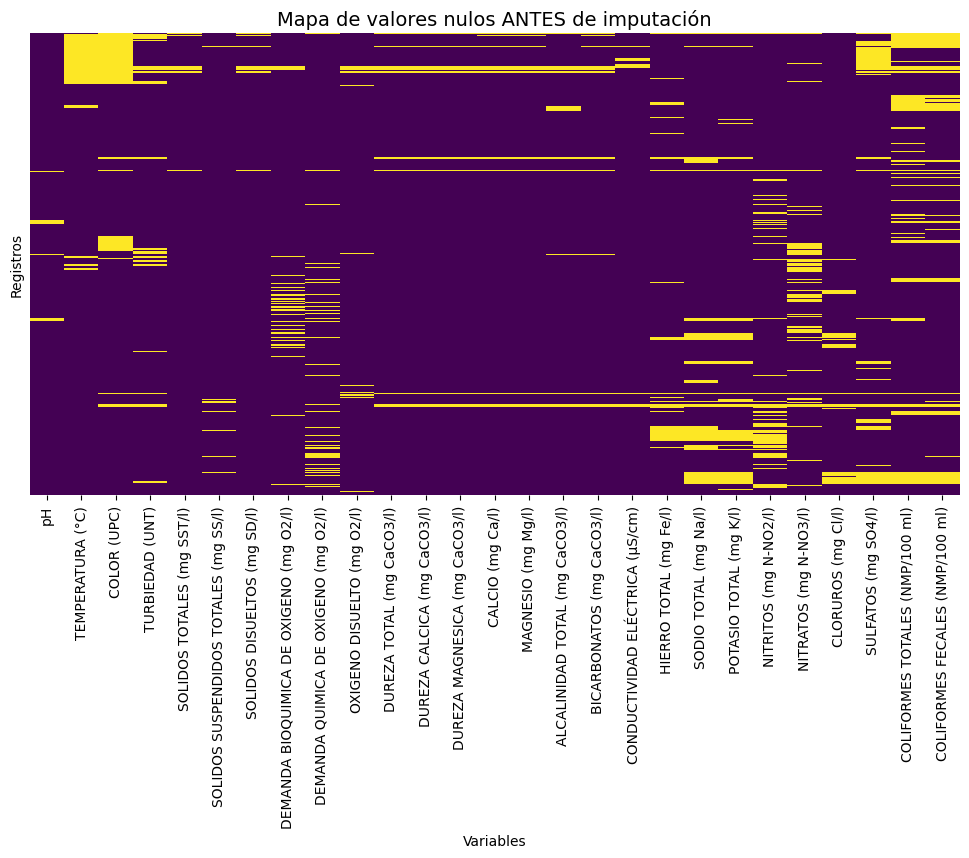

In [22]:
# --- Análisis de valores nulos ANTES de imputación ---

# 1) Conteo de nulos por variable
null_counts = df_filtrado.isnull().sum()
null_percent = (null_counts / len(df_filtrado)) * 100

# 2) Tabla resumen
tabla_nulos = pd.DataFrame({
    "Nulos": null_counts,
    "% Nulos": null_percent
}).sort_values(by="% Nulos", ascending=False)

# 3) Visualización gráfica (heatmap de nulos antes de imputación)
plt.figure(figsize=(12, 6))
sns.heatmap(df_filtrado.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Mapa de valores nulos ANTES de imputación", fontsize=14)
plt.xlabel("Variables")
plt.ylabel("Registros")
plt.show()

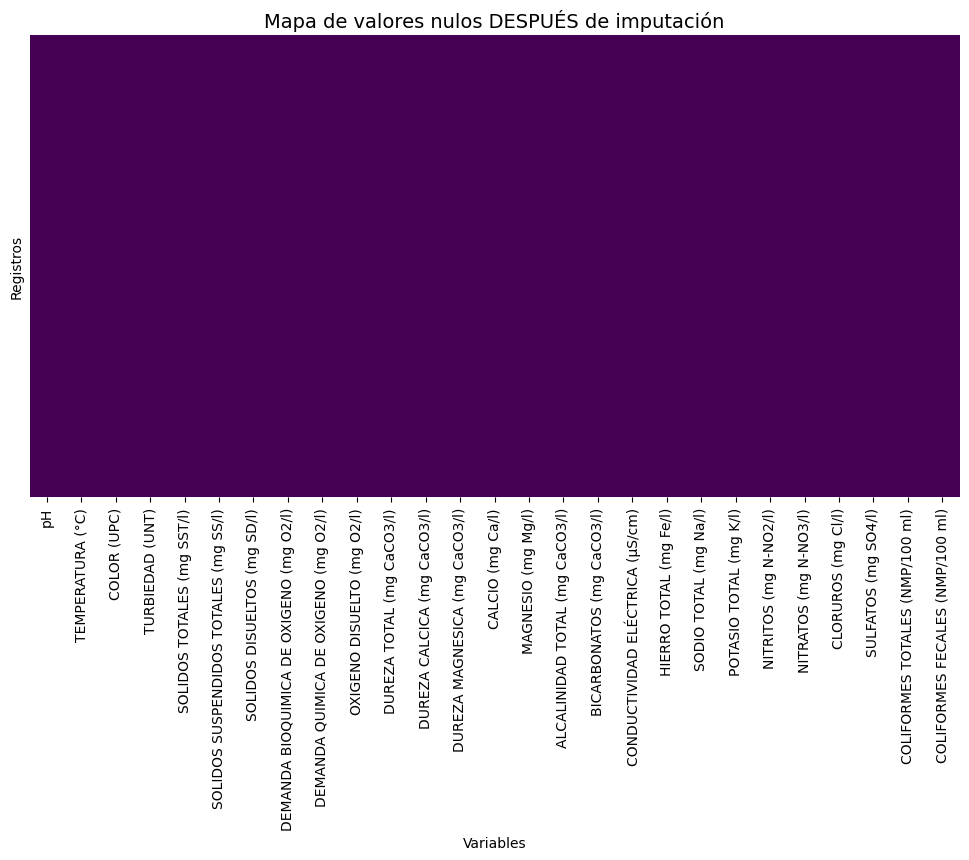

In [23]:
# 1. Escalar los datos
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_filtrado),
    columns=df_filtrado.columns
)

# 2. Imputar con KNN
imputer = KNNImputer(n_neighbors=5, weights="distance")
df_imputed_scaled = pd.DataFrame(
    imputer.fit_transform(df_scaled),
    columns=df_scaled.columns
)

# 3. Desescalar (volver a la escala original)
df_imputed = pd.DataFrame(
    scaler.inverse_transform(df_imputed_scaled),
    columns=df_filtrado.columns
)

# 4. Visualizar el resultado (valores nulos después de imputación)
plt.figure(figsize=(12, 6))
sns.heatmap(df_imputed.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Mapa de valores nulos DESPUÉS de imputación", fontsize=14)
plt.xlabel("Variables")
plt.ylabel("Registros")
plt.show()

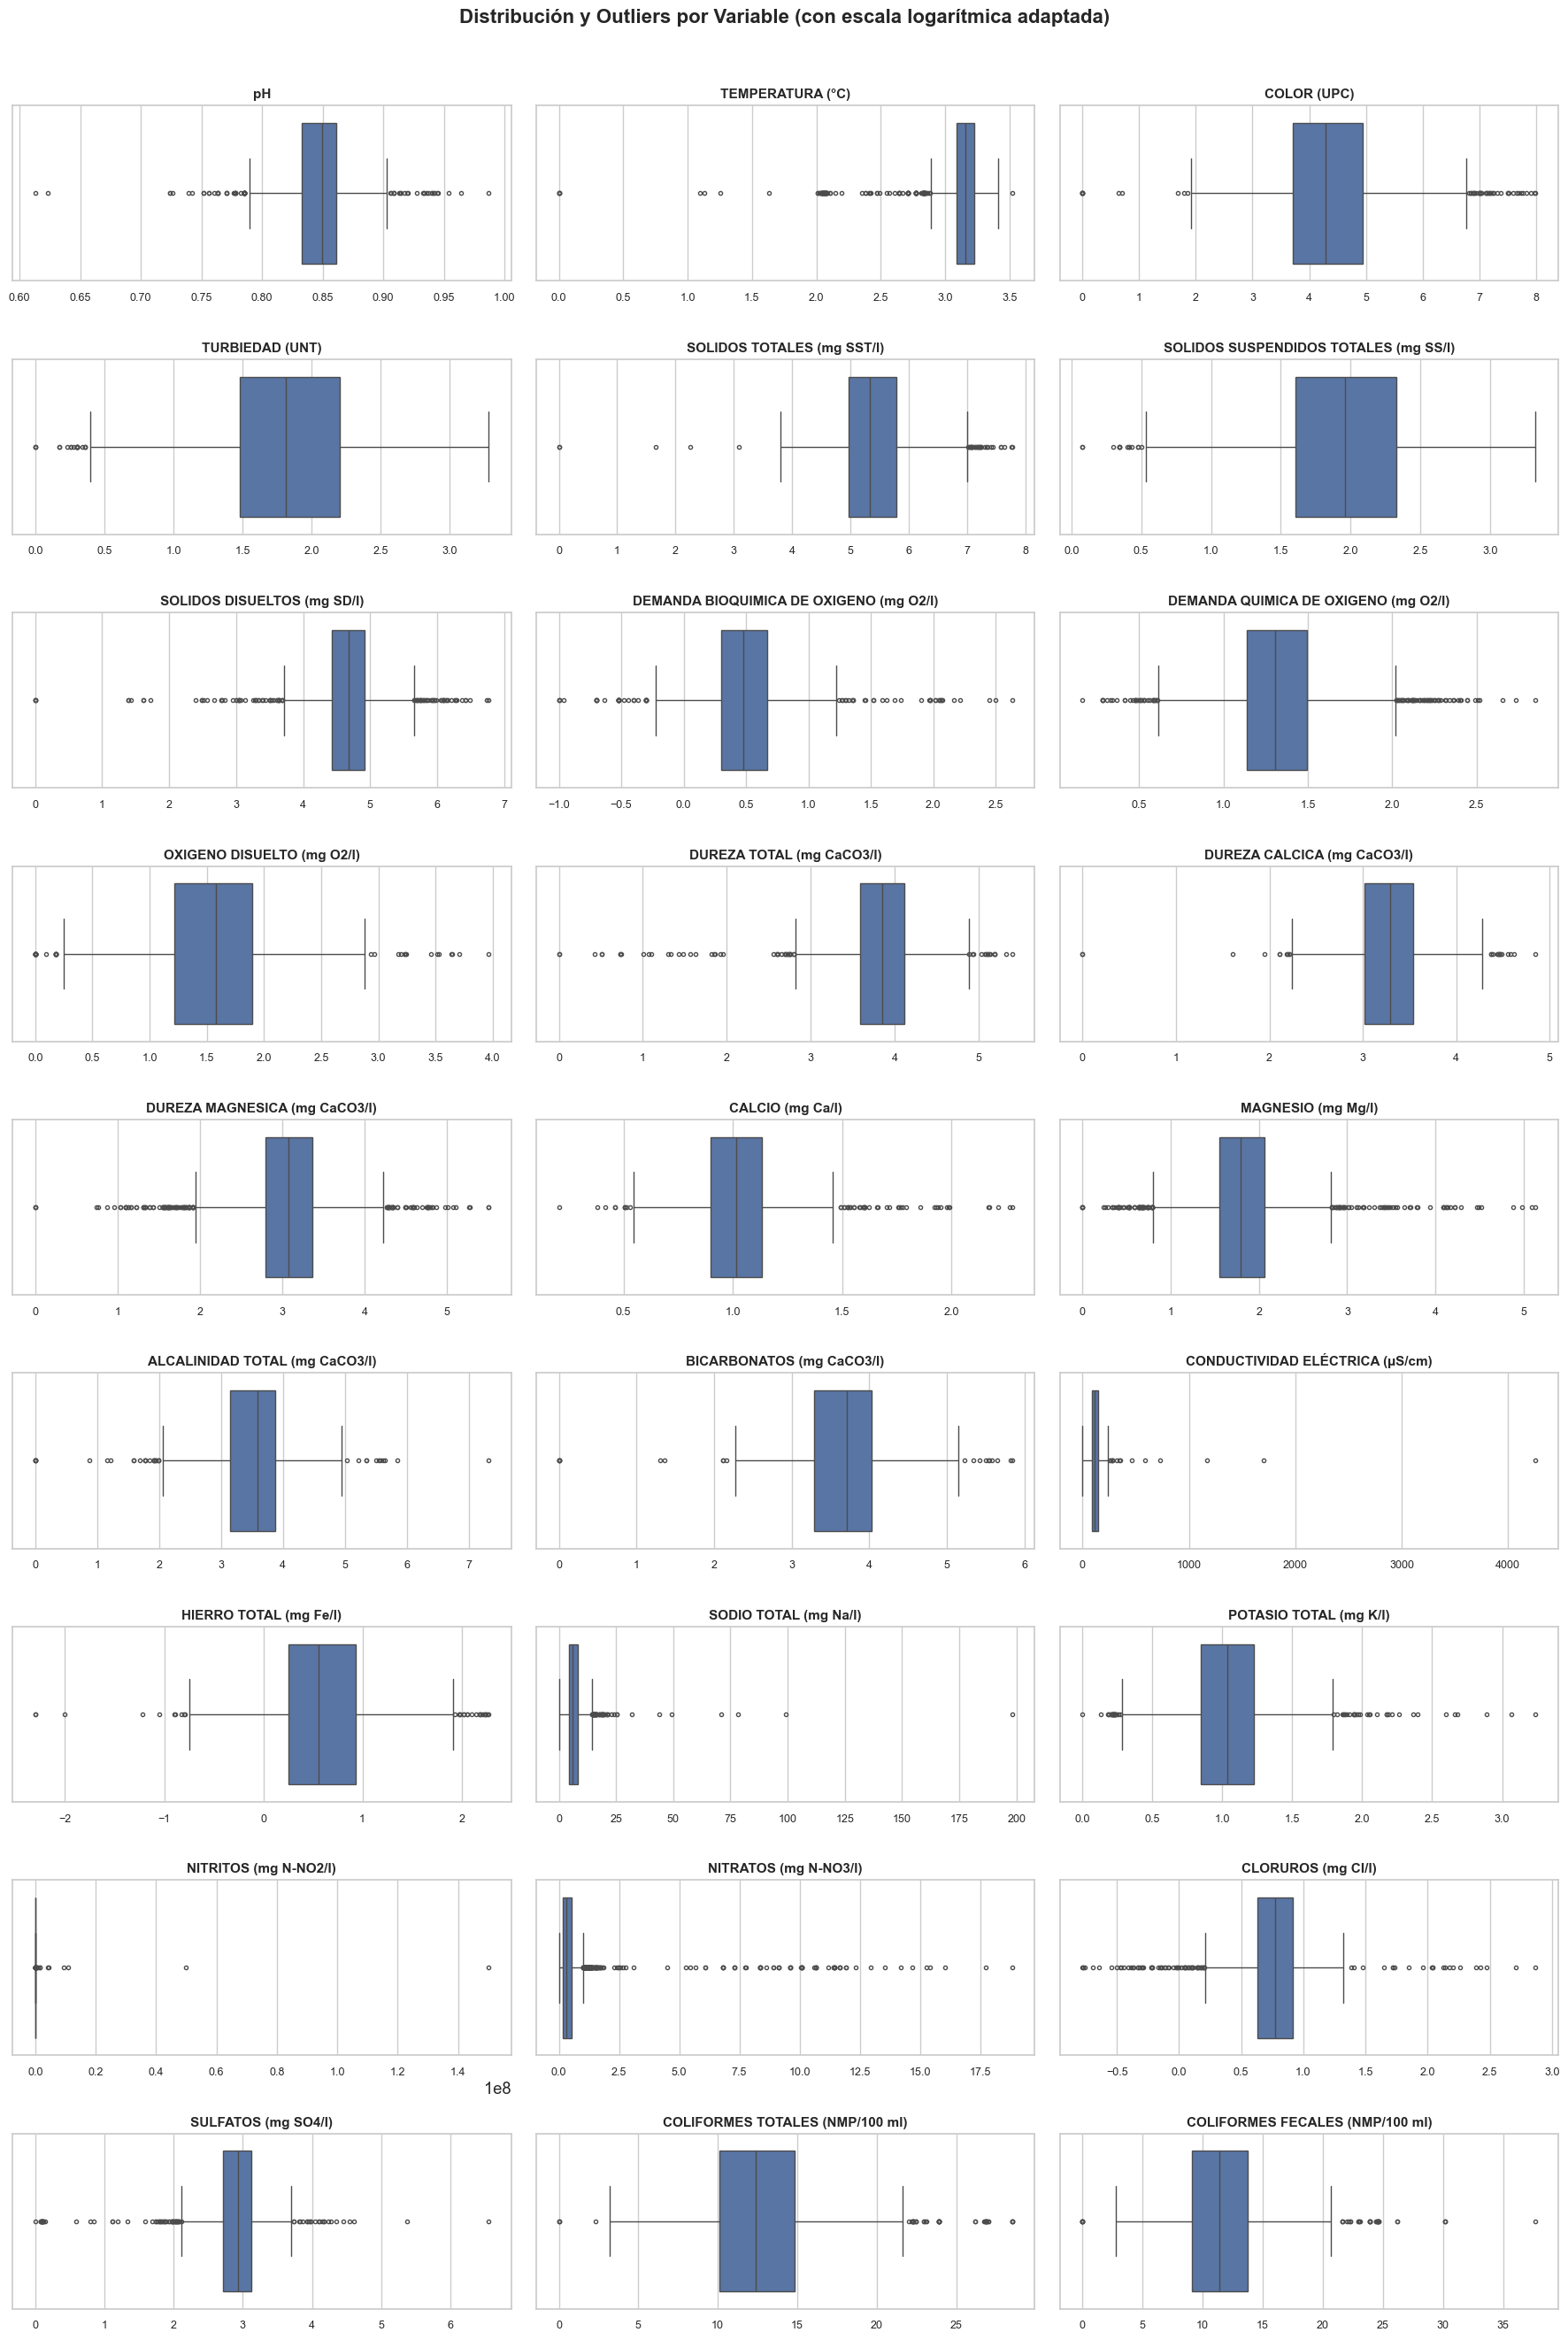

In [24]:
# Estilo gráfico
sns.set_theme(style="whitegrid", font_scale=1.2)

# Copia segura de la base imputada
df_box = df_imputed.copy()

# Función: aplicar logaritmo solo si es seguro
def log_transform_safe(series):
    s = pd.to_numeric(series, errors="coerce")
    if (s > 0).all():
        return np.log10(s)          # log base 10 si todos > 0
    elif (s >= 0).all():
        return np.log1p(s)          # log(1+x) si todos >= 0
    else:
        return s                    # si hay negativos, no se transforma

# Aplicar la transformación log segura a cada columna
df_box = df_box.apply(log_transform_safe)

# Configuración de subplots
num_vars = len(df_box.columns)
num_cols = 3
num_rows = int(np.ceil(num_vars / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 3))
axes = axes.flatten()

# Crear un boxplot por variable
for i, col in enumerate(df_box.columns):
    sns.boxplot(
        x=df_box[col],
        ax=axes[i],
        color="#4C72B0",
        fliersize=3,    # tamaño de puntos atípicos
        linewidth=1
    )
    axes[i].set_title(col, fontsize=11, fontweight="bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].tick_params(axis='x', labelsize=9)

# Eliminar subplots vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar diseño
fig.suptitle(
    "Distribución y Outliers por Variable (con escala logarítmica adaptada)",
    fontsize=16, fontweight="bold"
)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [25]:
ols_prob = ['NITRITOS (mg N-NO2/l)', 'CONDUCTIVIDAD ELÉCTRICA (µS/cm)']

diag = []
for c in ols_prob:
    s = pd.to_numeric(df_imputed[c], errors='coerce').dropna()

    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    outliers = ((s < q1 - 1.5*iqr) | (s > q3 + 1.5*iqr))

    diag.append({
        'col': c,
        'n': s.size,
        'zeros_%': (s.eq(0).mean() * 100).round(2),
        'min': s.min(),
        'q1': q1, 
        'median': s.median(), 
        'q3': q3, 
        'max': s.max(),
        'skew': s.skew(), 
        'kurt': s.kurt(),
        'outliers(n)': int(outliers.sum()),
        'outliers_%': (outliers.mean() * 100).round(2)
    })

pd.DataFrame(diag)

,col,n,zeros_%,min,q1,median,q3,max,skew,kurt,outliers(n),outliers_%
0,NITRITOS (mg N-NO2/l),2254,0.0,-1.455192e-11,0.01,0.0251,0.08885,150000000.0,41.428283,1810.841234,446,19.79
1,CONDUCTIVIDAD ELÉCTRICA (µS/cm),2254,0.0,-1.421085e-14,87.50,117.0000,151.00000,4259.0,28.374031,1052.214221,14,0.62


In [26]:
# Top 10 valores más altos para revisar posibles errores/unidades
cols_prob = ['NITRITOS (mg N-NO2/l)', 'CONDUCTIVIDAD ELÉCTRICA (µS/cm)']

for c in cols_prob:
    print(f"\nTop 10 valores de {c}:")
    top_vals = (
        df_imputed[[c]]
        .reset_index(names="idx")   # mostrar índice original como columna
        .sort_values(c, ascending=False)
        .head(10)
    )
    display(top_vals)


Top 10 valores de NITRITOS (mg N-NO2/l):


,idx,NITRITOS (mg N-NO2/l)
2166,2166,150000000.0
2174,2174,50000000.0
2171,2171,11000000.0
2172,2172,9300000.0
2168,2168,4600000.0
2175,2175,4300000.0
2180,2180,1500000.0
2165,2165,1500000.0
2186,2186,930000.0
2164,2164,430000.0



Top 10 valores de CONDUCTIVIDAD ELÉCTRICA (µS/cm):


,idx,CONDUCTIVIDAD ELÉCTRICA (µS/cm)
1078,1078,4259.0
1885,1885,1706.0
649,649,1172.0
374,374,727.2
1887,1887,589.0
1437,1437,467.0
744,744,354.0
342,342,343.4
46,46,319.5
561,561,283.9


In [27]:
def transform_robusta_para_plot(s: pd.Series, p_low=0.005, p_high=0.995):

    s = pd.to_numeric(s, errors='coerce').dropna()

    # epsilon = mitad del mínimo positivo para permitir log(0)
    min_pos = s[s > 0].min()
    eps = min_pos/2 if pd.notna(min_pos) and min_pos > 0 else 1e-12

    # Transformación según el rango
    if (s >= 0).all():
        s = np.log10(s + eps)
    else:
        med = s.median()
        iqr = (s.quantile(0.75) - s.quantile(0.25)) or 1.0
        s = (s - med) / iqr

    # Winsorización para limitar outliers extremos
    lo, hi = s.quantile(p_low), s.quantile(p_high)
    return s.clip(lo, hi)


# Copia para graficar con variables transformadas
df_plot = df_imputed.copy()
for c in cols_prob:
    df_plot[c] = transform_robusta_para_plot(df_imputed[c])


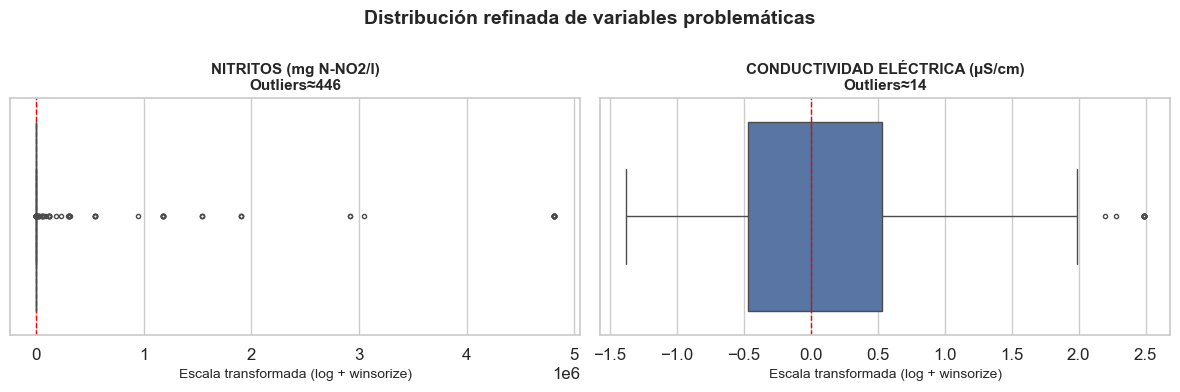

In [28]:
sns.set_theme(style="whitegrid", font_scale=1.1)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for ax, col in zip(axes, cols_prob):
    sns.boxplot(
        x=df_plot[col], 
        ax=ax, 
        color="#4C72B0", 
        fliersize=3, 
        linewidth=1
    )
    # Línea en la mediana
    ax.axvline(df_plot[col].median(), ls="--", color="red", lw=1)
    
    # Contar outliers extremos (en escala transformada)
    q1, q3 = df_plot[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    outliers = ((df_plot[col] < q1 - 1.5*iqr) | (df_plot[col] > q3 + 1.5*iqr)).sum()

    ax.set_title(f"{col}\nOutliers≈{outliers}", fontsize=11, fontweight="bold")
    ax.set_xlabel("Escala transformada (log + winsorize)", fontsize=10)
    ax.set_ylabel("")

fig.suptitle("Distribución refinada de variables problemáticas", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


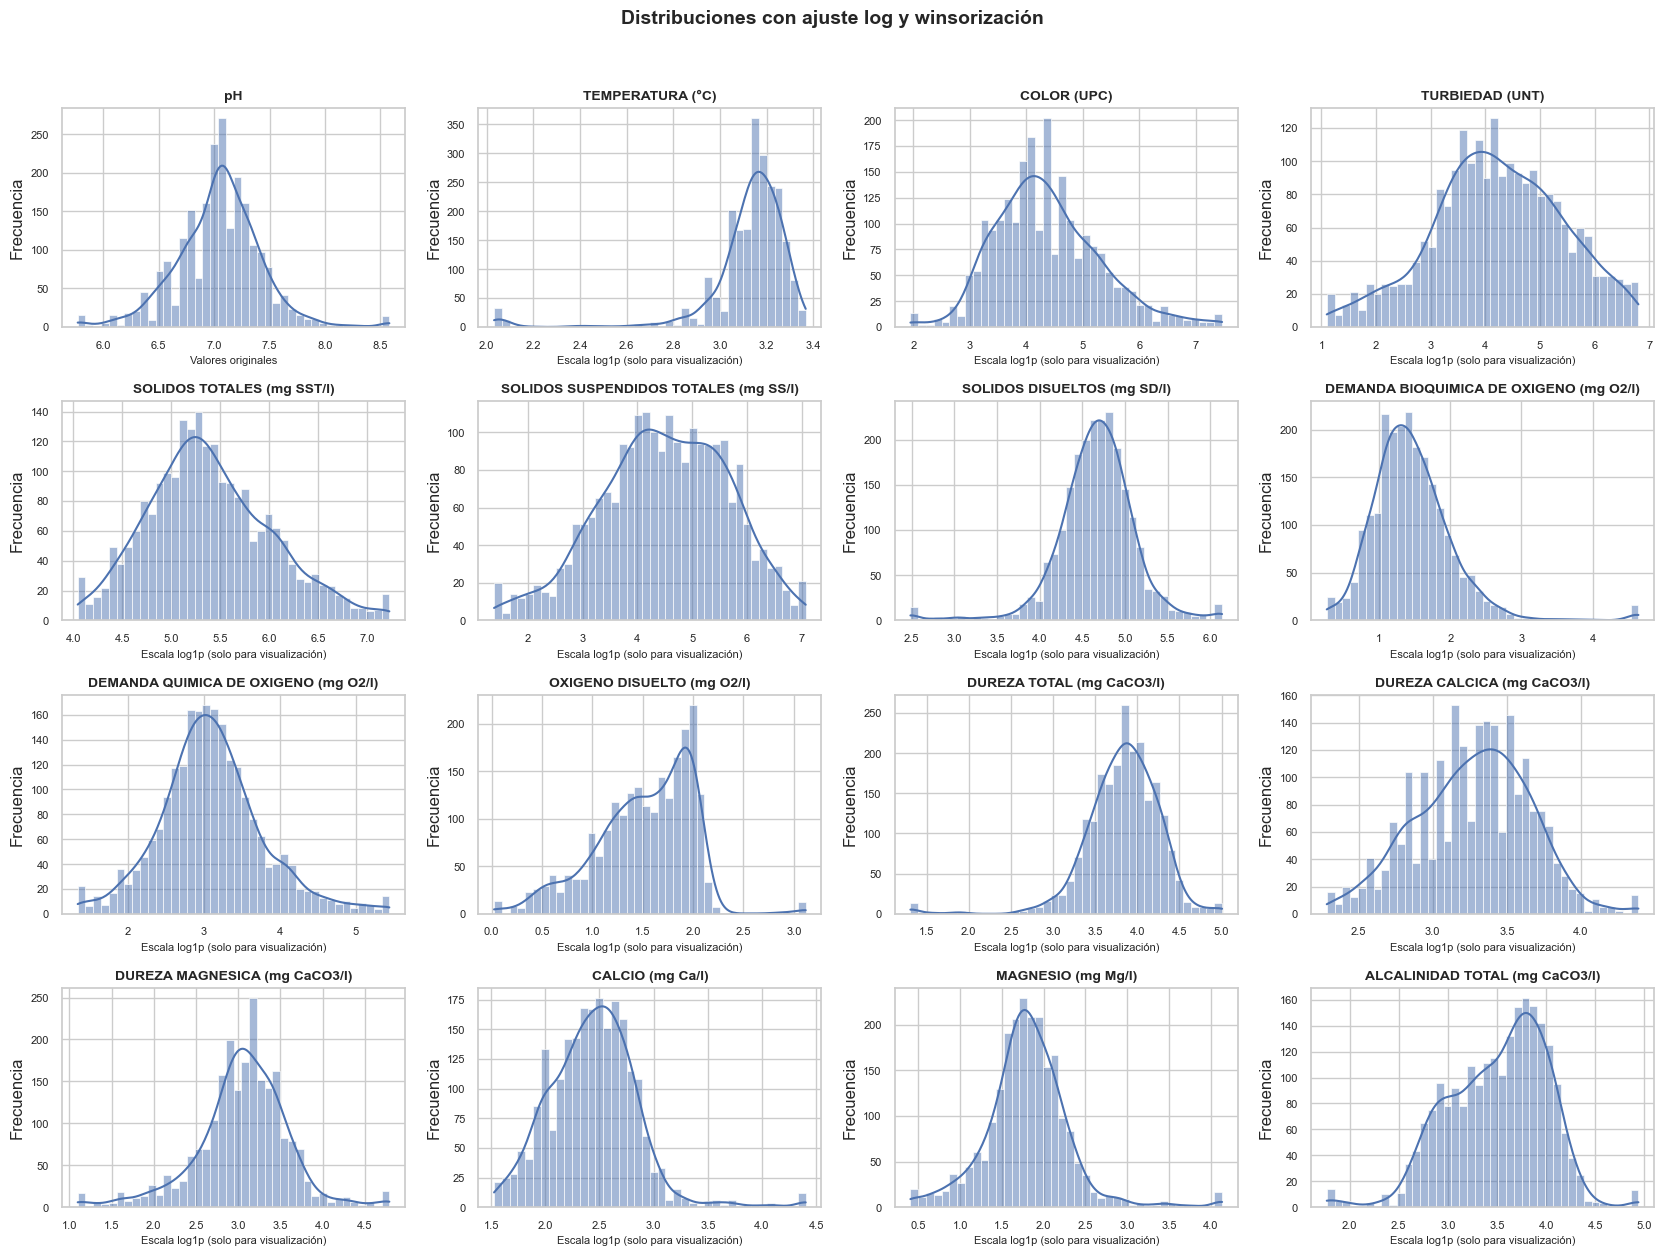

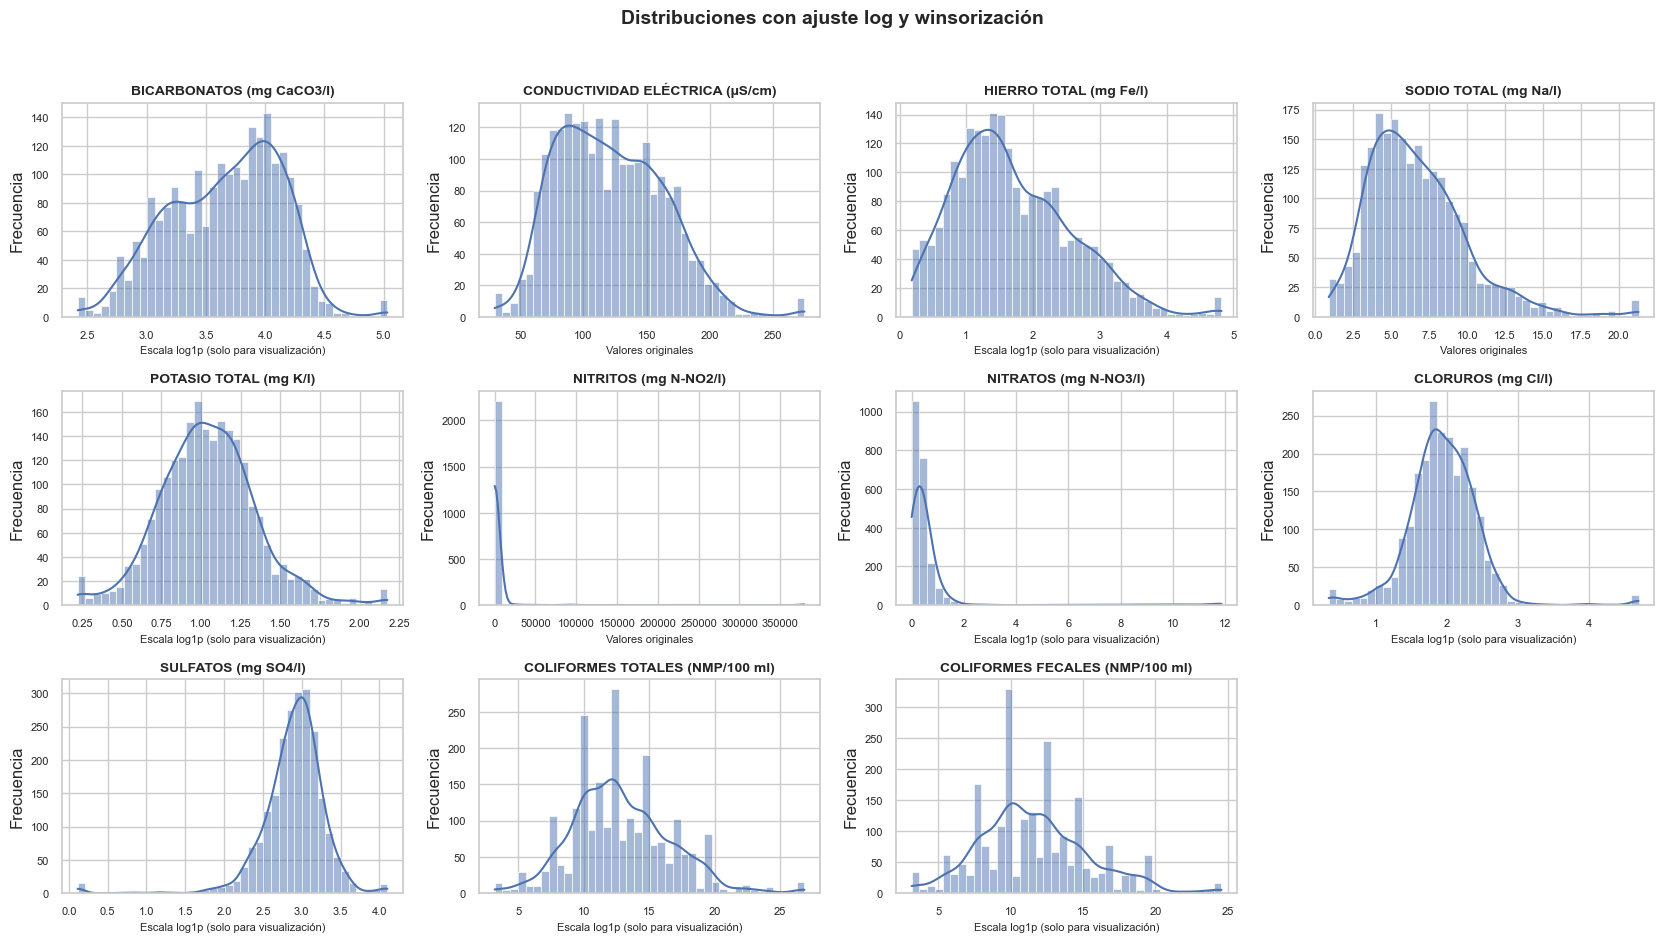

In [29]:
sns.set_theme(style="whitegrid")

# utilidad: decidir si conviene log
def needs_log(series, skew_thr=1.0):
    s = pd.to_numeric(series, errors='coerce').dropna()
    return (s.min() >= 0) and (abs(s.skew()) > skew_thr)

# utilidad: preparar para graficar
def prep_for_plot(series, winsor=(0.005, 0.995), bins=40):
    s = pd.to_numeric(series, errors='coerce').dropna()
    if needs_log(s):
        s = np.log1p(s)   # log(1+x), estable para 0+
        xlab = "Escala log1p (solo para visualización)"
    else:
        xlab = "Valores originales"
    lo, hi = s.quantile(winsor[0]), s.quantile(winsor[1])
    s = s.clip(lo, hi)
    return s, xlab

# columnas numéricas válidas
num_cols = df_imputed.select_dtypes(include='number').columns.tolist()
num_cols = [c for c in num_cols if df_imputed[c].notna().any()]

# parámetros de layout
COLS = 4
BINS = 40
PAGE = COLS * 4
H, W = 3.2, 4.2

# loop por páginas
for start in range(0, len(num_cols), PAGE):
    subset = num_cols[start:start+PAGE]
    rows = int(np.ceil(len(subset) / COLS))
    fig, axes = plt.subplots(rows, COLS, figsize=(W*COLS, H*rows))
    axes = np.array(axes).reshape(-1)

    for ax, col in zip(axes, subset):
        s_plot, xlab = prep_for_plot(df_imputed[col], winsor=(0.005, 0.995), bins=BINS)
        sns.histplot(s_plot, bins=BINS, kde=(len(s_plot) > 50), ax=ax, color="#4C72B0")
        ax.set_title(col, fontsize=10, fontweight="bold")
        ax.set_xlabel(xlab, fontsize=8)
        ax.set_ylabel("Frecuencia")
        ax.tick_params(axis='both', labelsize=8)

    # limpiar ejes vacíos
    for ax in axes[len(subset):]:
        ax.remove()

    fig.suptitle("Distribuciones con ajuste log y winsorización", fontsize=14, fontweight="bold")
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


# CORRELACIONES (excluyendo objetivos)

Columnas usadas para correlación entre predictores: 25
Objetivos excluidos del mapa entre predictores: ['DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)', 'pH']

Pares altamente correlacionados (Pearson):


,Variable_1,Variable_2,Correlacion
285,NITRITOS (mg N-NO2/l),NITRATOS (mg N-NO3/l),0.999167
69,SOLIDOS TOTALES (mg SST/l),SOLIDOS SUSPENDIDOS TOTALES (mg SS/l),0.945886
209,CALCIO (mg Ca/l),MAGNESIO (mg Mg/l),0.889820
196,DUREZA MAGNESICA (mg CaCO3/l),MAGNESIO (mg Mg/l),0.862277



Pares altamente correlacionados (Spearman):


,Variable_1,Variable_2,Correlacion
196,DUREZA MAGNESICA (mg CaCO3/l),MAGNESIO (mg Mg/l),0.989248
181,DUREZA CALCICA (mg CaCO3/l),CALCIO (mg Ca/l),0.959695
234,ALCALINIDAD TOTAL (mg CaCO3/l),BICARBONATOS (mg CaCO3/l),0.933178
299,COLIFORMES TOTALES (NMP/100 ml),COLIFORMES FECALES (NMP/100 ml),0.890696
69,SOLIDOS TOTALES (mg SST/l),SOLIDOS SUSPENDIDOS TOTALES (mg SS/l),0.863731
164,DUREZA TOTAL (mg CaCO3/l),DUREZA CALCICA (mg CaCO3/l),0.817818
165,DUREZA TOTAL (mg CaCO3/l),DUREZA MAGNESICA (mg CaCO3/l),0.804018


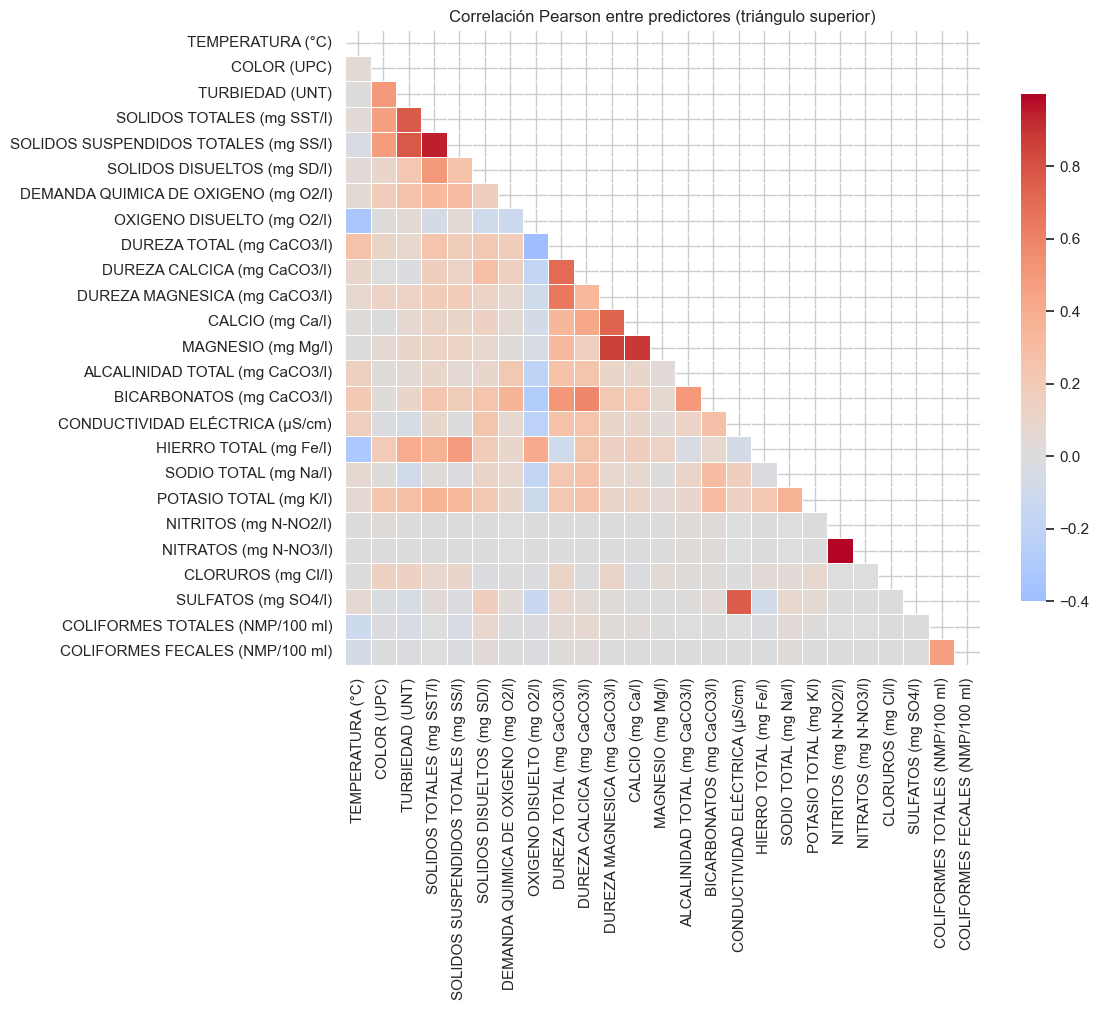

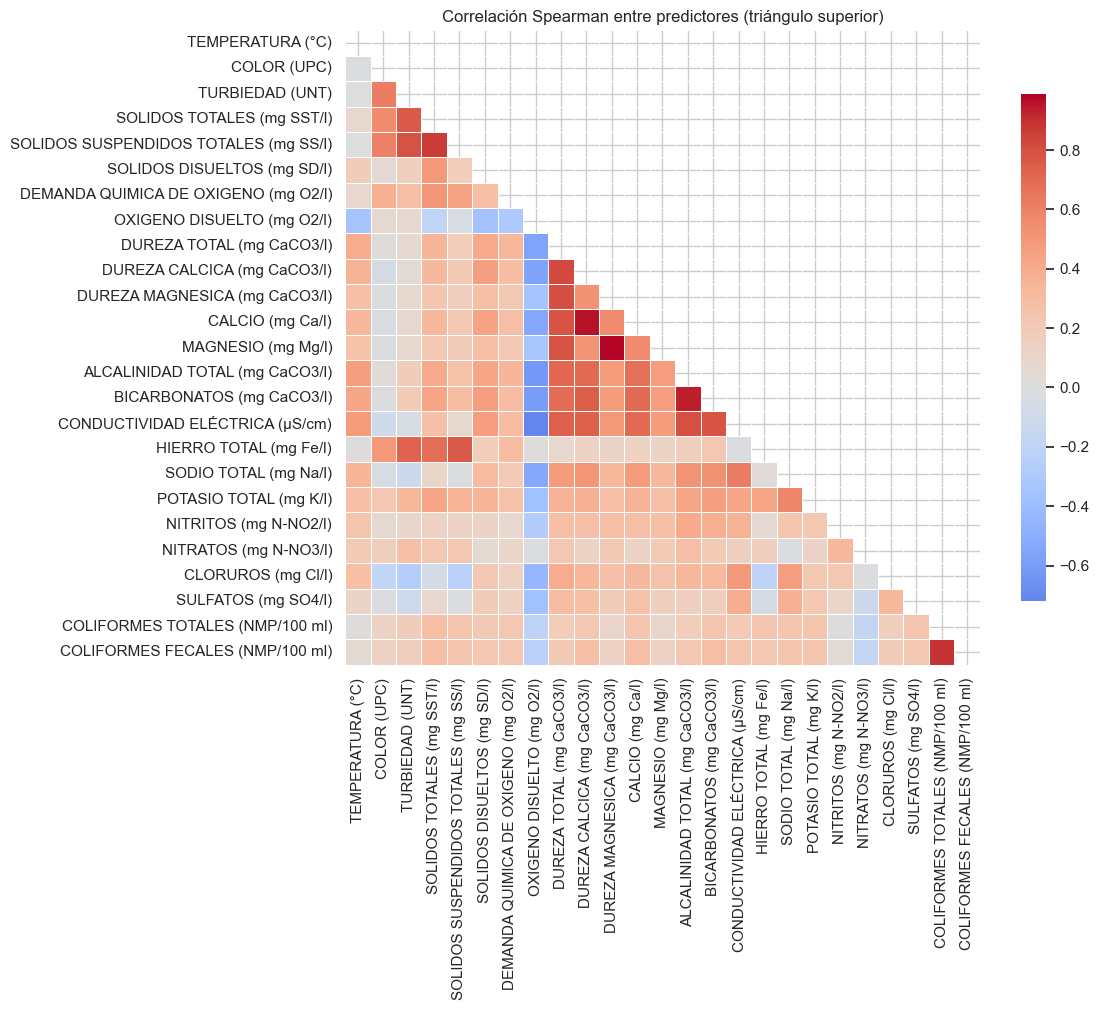


Correlación Spearman de predictores con el objetivo: DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)


,Spearman_vs_objetivo
BICARBONATOS (mg CaCO3/l),0.526899
CONDUCTIVIDAD ELÉCTRICA (µS/cm),0.500682
ALCALINIDAD TOTAL (mg CaCO3/l),0.488444
CALCIO (mg Ca/l),0.460828
DUREZA CALCICA (mg CaCO3/l),0.458406
SODIO TOTAL (mg Na/l),0.381278
DUREZA TOTAL (mg CaCO3/l),0.357546
COLIFORMES FECALES (NMP/100 ml),0.354755
POTASIO TOTAL (mg K/l),0.335980
DEMANDA QUIMICA DE OXIGENO (mg O2/l),0.320140



Correlación Spearman de predictores con el objetivo: pH


,Spearman_vs_objetivo
NITRATOS (mg N-NO3/l),0.306038
ALCALINIDAD TOTAL (mg CaCO3/l),0.285236
BICARBONATOS (mg CaCO3/l),0.243331
TEMPERATURA (°C),0.235442
DUREZA CALCICA (mg CaCO3/l),0.172514
NITRITOS (mg N-NO2/l),0.170256
CALCIO (mg Ca/l),0.164018
CONDUCTIVIDAD ELÉCTRICA (µS/cm),0.158347
DUREZA TOTAL (mg CaCO3/l),0.153381
SOLIDOS SUSPENDIDOS TOTALES (mg SS/l),0.107343


In [30]:
# Requisitos: df_imputed ya creado; 'objetivos' definido (1 o 2 nombres exactos en df_imputed)

# Preparar base numérica y limpiar
df_num = df_imputed.select_dtypes(include='number').copy()
df_num = df_num.replace([np.inf, -np.inf], np.nan).dropna(axis=1, how='all')

# Quitar columnas constantes
var0 = df_num.nunique(dropna=True) <= 1
if var0.any():
    df_num = df_num.loc[:, ~var0]

# Excluir objetivos del bloque de correlación entre predictores
objetivos_presentes = [o for o in (objetivos if 'objetivos' in globals() else []) if o in df_num.columns]
pred_cols = [c for c in df_num.columns if c not in objetivos_presentes]

print(f"Columnas usadas para correlación entre predictores: {len(pred_cols)}")
if objetivos_presentes:
    print("Objetivos excluidos del mapa entre predictores:", objetivos_presentes)

assert len(pred_cols) > 1, "No hay columnas numéricas válidas para correlación entre predictores."

# Correlaciones entre predictores (Pearson y Spearman)
corr_p = df_num[pred_cols].corr(method='pearson')
corr_s = df_num[pred_cols].corr(method='spearman')

# Función para extraer pares fuertes (sin duplicados)
def pares_fuertes(corr, umbral=0.8):
    mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
    corr_u = corr.where(mask)
    out = (
        corr_u.stack()
        .rename("Correlacion")
        .reset_index()
        .rename(columns={"level_0": "Variable_1", "level_1": "Variable_2"})
        .assign(abs_val=lambda d: d["Correlacion"].abs())
        .query("abs_val >= @umbral")
        .sort_values("abs_val", ascending=False)
        .drop(columns="abs_val")
    )
    return out

pares_pearson  = pares_fuertes(corr_p, umbral=0.8)
pares_spearman = pares_fuertes(corr_s, umbral=0.8)

print("\nPares altamente correlacionados (Pearson):")
display(pares_pearson.head(20))
print("\nPares altamente correlacionados (Spearman):")
display(pares_spearman.head(20))

# Heatmaps (triángulo superior)
def heatmap_corr(corr, title):
    mask = np.triu(np.ones_like(corr, dtype=bool))
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        corr, mask=mask, cmap="coolwarm", center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .8}
    )
    plt.title(title)
    plt.tight_layout()
    plt.show()

heatmap_corr(corr_p, "Correlación Pearson entre predictores (triángulo superior)")
heatmap_corr(corr_s, "Correlación Spearman entre predictores (triángulo superior)")

# (Extra útil) Correlación de CADA objetivo vs. predictores
if objetivos_presentes:
    for obj in objetivos_presentes:
        # solo columnas que coexisten con el objetivo sin NaN simultáneo
        sub = df_num[pred_cols + [obj]].dropna(subset=[obj])
        corr_obj = sub.corr(method='spearman')[obj].drop(labels=[obj]).sort_values(ascending=False)
        print(f"\nCorrelación Spearman de predictores con el objetivo: {obj}")
        display(corr_obj.to_frame(name="Spearman_vs_objetivo"))


# FILTRO POR COLINEALIDAD (Spearman)

In [31]:
# Usa corr_s (entre predictores) ya calculado
UMBRAL = 0.85  # ajusta a gusto (0.8-0.9 suele ser razonable)

corr_abs = corr_s.abs()
mask_sup = np.triu(np.ones_like(corr_abs, dtype=bool), k=1)
pairs = (
    corr_abs.where(mask_sup)
    .stack()
    .rename("rho")
    .reset_index()
    .rename(columns={"level_0": "A", "level_1": "B"})
    .query("rho >= @UMBRAL")
    .sort_values("rho", ascending=False)
)

print(f"Pares con |Spearman| ≥ {UMBRAL}: {len(pairs)}")
display(pairs.head(20))

# ===== Heurística mejorada para decidir a quién eliminar =====
# 1) Preferir la variable con MAYOR |corr| respecto al/los objetivo(s) seleccionados.
# 2) Si no hay objetivos (o empate), usar el mayor promedio de |corr| con las demás (tu fallback).

# Objetivos presentes en df_num (si definiste 'objetivos' antes)
objetivos_presentes = [o for o in (objetivos if 'objetivos' in globals() else []) if o in df_imputed.columns]

# Construir score por variable basado en relación con objetivos
target_score = {}
if objetivos_presentes:
    # Spearman entre TODOS los numéricos y cada objetivo (en abs) y tomamos el máximo por variable
    for var in df_num.columns:
        if var in objetivos_presentes:
            continue
        cors = []
        for obj in objetivos_presentes:
            sub = df_imputed[[var, obj]].dropna()
            if sub.shape[0] > 2:
                cors.append(sub.corr(method='spearman').iloc[0, 1])
        target_score[var] = np.max(np.abs(cors)) if cors else 0.0
else:
    # si no hay objetivos, score = 0 (se usará el fallback)
    target_score = {var: 0.0 for var in df_num.columns}

# Fallback: correlación media absoluta con el resto (tu criterio original)
mean_abs_corr = corr_abs.mean().to_dict()

eliminar, conservar = set(), set()

for _, row in pairs.iterrows():
    a, b = row["A"], row["B"]
    # si ya se decidió algo por pares anteriores, saltar
    if a in eliminar or b in eliminar:
        continue

    # nunca eliminar objetivos (por seguridad, aunque aquí no deberían estar)
    if a in objetivos_presentes:
        conservar.add(a); eliminar.add(b); continue
    if b in objetivos_presentes:
        conservar.add(b); eliminar.add(a); continue

    # 1) usar score con objetivos
    ta, tb = target_score.get(a, 0.0), target_score.get(b, 0.0)

    if not np.isclose(ta, tb):
        keep, drop = (a, b) if ta > tb else (b, a)
    else:
        # 2) empate o sin objetivos -> usar promedio de |corr|
        ma, mb = mean_abs_corr.get(a, 0.0), mean_abs_corr.get(b, 0.0)
        keep, drop = (a, b) if ma >= mb else (b, a)

    conservar.add(keep)
    eliminar.add(drop)

eliminar = sorted(eliminar)
print(f"\nVariables a eliminar por alta colinealidad (heurística objetivo→fallback):")
print(eliminar)

# DataFrame filtrado por correlación (listo para VIF / feature selection)
df_corr_filtered = df_num.drop(columns=eliminar, errors='ignore')

print(f"\nShape original (numérico): {df_num.shape}")
print(f"Shape tras filtrar por correlación: {df_corr_filtered.shape}")

# ver resumen de lo conservado
conservadas = list(df_corr_filtered.columns)
print(f"\nVariables conservadas ({len(conservadas)}):")
conservadas

Pares con |Spearman| ≥ 0.85: 5


,A,B,rho
196,DUREZA MAGNESICA (mg CaCO3/l),MAGNESIO (mg Mg/l),0.989248
181,DUREZA CALCICA (mg CaCO3/l),CALCIO (mg Ca/l),0.959695
234,ALCALINIDAD TOTAL (mg CaCO3/l),BICARBONATOS (mg CaCO3/l),0.933178
299,COLIFORMES TOTALES (NMP/100 ml),COLIFORMES FECALES (NMP/100 ml),0.890696
69,SOLIDOS TOTALES (mg SST/l),SOLIDOS SUSPENDIDOS TOTALES (mg SS/l),0.863731



Variables a eliminar por alta colinealidad (heurística objetivo→fallback):
['ALCALINIDAD TOTAL (mg CaCO3/l)', 'COLIFORMES TOTALES (NMP/100 ml)', 'DUREZA CALCICA (mg CaCO3/l)', 'DUREZA MAGNESICA (mg CaCO3/l)', 'SOLIDOS SUSPENDIDOS TOTALES (mg SS/l)']

Shape original (numérico): (2254, 27)
Shape tras filtrar por correlación: (2254, 22)

Variables conservadas (22):


['pH',
 'TEMPERATURA (°C)',
 'COLOR (UPC)',
 'TURBIEDAD (UNT)',
 'SOLIDOS TOTALES (mg SST/l)',
 'SOLIDOS DISUELTOS (mg SD/l)',
 'DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)',
 'DEMANDA QUIMICA DE OXIGENO (mg O2/l)',
 'OXIGENO DISUELTO (mg O2/l)',
 'DUREZA TOTAL (mg CaCO3/l)',
 'CALCIO (mg Ca/l)',
 'MAGNESIO (mg Mg/l)',
 'BICARBONATOS (mg CaCO3/l)',
 'CONDUCTIVIDAD ELÉCTRICA (µS/cm)',
 'HIERRO TOTAL (mg Fe/l)',
 'SODIO TOTAL (mg Na/l)',
 'POTASIO TOTAL (mg K/l)',
 'NITRITOS (mg N-NO2/l)',
 'NITRATOS (mg N-NO3/l)',
 'CLORUROS (mg Cl/l)',
 'SULFATOS (mg SO4/l)',
 'COLIFORMES FECALES (NMP/100 ml)']

# VIF iterativo

In [32]:
# df_corr_filtered: viene del paso anterior (filtrado por correlación)
X0 = df_corr_filtered.copy()

# Por seguridad, quitar filas con NaN residuales
X0 = X0.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

# Objetivos a proteger (no deben eliminarse nunca)
objetivos_presentes = [o for o in (objetivos if 'objetivos' in globals() else []) if o in X0.columns]

def calc_vif(dfX: pd.DataFrame) -> pd.DataFrame:
    """Calcula VIF para todas las columnas de dfX."""
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    Xmat = dfX.values
    vif_vals = [variance_inflation_factor(Xmat, i) for i in range(Xmat.shape[1])]
    return pd.DataFrame({"feature": dfX.columns, "VIF": vif_vals}).sort_values("VIF", ascending=False)

UMBRAL_VIF = 10.0
removed = []
vif_historial = []

X = X0.copy()

while True:
    vif_df = calc_vif(X)
    vif_historial.append(vif_df.assign(iter=len(vif_historial)+1))

    # variable con VIF máximo
    idx_max = vif_df["VIF"].idxmax()
    feat_max = vif_df.loc[idx_max, "feature"]
    max_vif = vif_df.loc[idx_max, "VIF"]

    print(f"Iteración {len(vif_historial)} | Máx VIF = {max_vif:.2f} ({feat_max}) | n_vars = {X.shape[1]}")

    # condición de parada
    if (max_vif <= UMBRAL_VIF) or (X.shape[1] <= 2):
        break

    # NO eliminar objetivos
    if feat_max in objetivos_presentes:
        print(f"{feat_max} es objetivo, se conserva aunque tenga VIF alto.")
        break

    # eliminar la variable más colineal y repetir
    removed.append((feat_max, float(max_vif)))
    X = X.drop(columns=[feat_max])

# DataFrames de salida
vif_historial = pd.concat(vif_historial, ignore_index=True)
vif_final = calc_vif(X).reset_index(drop=True)
df_vif_filtered = X.copy()

print("\nVariables eliminadas por VIF > {:.1f}:".format(UMBRAL_VIF))
for f, v in removed:
    print(f"  - {f} (VIF={v:.2f})")

print("\nResumen:")
print(f"Shape inicial (post-correlación): {X0.shape}")
print(f"Shape final (post-VIF):           {df_vif_filtered.shape}")

print("\nVIF final (variables conservadas):")
display(vif_final)

Iteración 1 | Máx VIF = 616.90 (NITRITOS (mg N-NO2/l)) | n_vars = 22
Iteración 2 | Máx VIF = 5.86 (CALCIO (mg Ca/l)) | n_vars = 21

Variables eliminadas por VIF > 10.0:
  - NITRITOS (mg N-NO2/l) (VIF=616.90)

Resumen:
Shape inicial (post-correlación): (2254, 22)
Shape final (post-VIF):           (2254, 21)

VIF final (variables conservadas):


,feature,VIF
0,CALCIO (mg Ca/l),5.855409
1,MAGNESIO (mg Mg/l),5.740587
2,SOLIDOS TOTALES (mg SST/l),3.903843
3,TURBIEDAD (UNT),3.168682
4,HIERRO TOTAL (mg Fe/l),2.994304
5,CONDUCTIVIDAD ELÉCTRICA (µS/cm),2.949222
6,SULFATOS (mg SO4/l),2.608597
7,DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),2.223375
8,BICARBONATOS (mg CaCO3/l),1.979933
9,DUREZA TOTAL (mg CaCO3/l),1.911038


In [33]:
# Helpers necesarios por RFE
import numpy as np
import pandas as pd

def get_feature_frame_base():
    if 'df_vif_filtered' in globals():              # tras VIF
        X0 = df_vif_filtered.copy()
    elif 'df_filtrado' in globals():                # tras filtro de completitud
        X0 = df_filtrado.copy()
    elif 'df_base' in globals():
        X0 = df_base.copy()
    else:
        X0 = df_imputed.select_dtypes(include='number').copy()
    X0 = X0.replace([np.inf, -np.inf], np.nan).dropna(axis=1, how='all')
    const = X0.nunique(dropna=True) <= 1
    if const.any():
        X0 = X0.loc[:, ~const]
    return X0

def build_X_y_for_target(y_col: str):
    assert 'df_imputed' in globals(), "df_imputed no está definido."
    assert y_col in df_imputed.columns, f"No encuentro '{y_col}' en df_imputed."
    X0 = get_feature_frame_base()
    if y_col in X0.columns:
        X0 = X0.drop(columns=[y_col])
    X = X0.select_dtypes(include='number').copy()
    y = df_imputed.loc[X.index, y_col].copy()
    mask = y.notna()
    X = X.loc[mask]; y = y.loc[mask]
    X, y = X.align(y, join='inner', axis=0)
    return X, y

# chequeo rápido
print("build_X_y_for_target disponible?:", 'build_X_y_for_target' in globals())

build_X_y_for_target disponible?: True


In [34]:
# RFE optimizado
import numpy as np, pandas as pd
from math import ceil, sqrt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def _get_active_Xy(y_col):
    X, y = build_X_y_for_target(y_col)
    X = X.replace([np.inf, -np.inf], np.nan).dropna(axis=1, how='all')
    return X, y

def _preselect_topk_spearman(X, y, k=20):
    cor = X.apply(lambda c: c.corr(y, method="spearman")).abs().sort_values(ascending=False)
    keep = cor.index[:min(k, X.shape[1])]
    return X[keep].copy()

def rfe_seleccion_por_objetivo(y_col, k=None, usar_preselect=True, top_pre=20, step=2):
    X, y = _get_active_Xy(y_col)
    if usar_preselect and X.shape[1] > top_pre:
        X = _preselect_topk_spearman(X, y, k=top_pre)

    p = X.shape[1]
    k_final = min(p, max(5, int(sqrt(p))) if k is None else k)
    modelos = {
        "RFE-Linear": ("std", LinearRegression()),
        "RFE-Ridge":  ("std", Ridge(alpha=1.0)),
        "RFE-SVRlin": ("minmax", SVR(kernel="linear", C=2.0))
    }
    votos = {}
    for nombre, (escala, est) in modelos.items():
        if escala == "std":
            Xs = pd.DataFrame(StandardScaler().fit_transform(X), index=X.index, columns=X.columns)
        else:
            Xs = pd.DataFrame(MinMaxScaler().fit_transform(X), index=X.index, columns=X.columns)
        sel = RFE(estimator=est, n_features_to_select=k_final, step=step).fit(Xs, y)
        kept = X.columns[sel.support_]
        for f in kept:
            votos[f] = votos.get(f, 0) + 1

    votos_df = pd.DataFrame({"feature": list(votos.keys()), "votos": list(votos.values())}) \
                 .sort_values("votos", ascending=False).reset_index(drop=True)
    mayoria_umbral = ceil(len(modelos)/2)  # con 3 modelos, mayoría = 2
    seleccion_mayoria = votos_df.loc[votos_df["votos"] >= mayoria_umbral, "feature"].tolist()
    return {"tabla_votos": votos_df, "seleccion_mayoria": seleccion_mayoria, "k_final": k_final, "p_analizado": p}

# ejecutar RFE para los objetivos y construir una selección común que luego se unirá con Permuted
rfe_resultados = {}
for target in objetivos:  # objetivos = [DBO, pH] ya fijados
    rfe_resultados[target] = rfe_seleccion_por_objetivo(target, k=None, usar_preselect=True, top_pre=20, step=2)

if len(objetivos) == 2:
    a, b = objetivos
    rfe_comun = sorted(list(set(rfe_resultados[a]["seleccion_mayoria"]).intersection(rfe_resultados[b]["seleccion_mayoria"])))
    if len(rfe_comun) < 5:
        rfe_comun = sorted(list(set(rfe_resultados[a]["seleccion_mayoria"]).union(rfe_resultados[b]["seleccion_mayoria"])))
else:
    rfe_comun = rfe_resultados[objetivos[0]]["seleccion_mayoria"]

print("Selección RFE por objetivo:")
for t in objetivos:
    print(f" - {t}: {rfe_resultados[t]['seleccion_mayoria']}")
print("Selección RFE común (pH ∩ DBO, con fallback a unión si es corta):", rfe_comun)

Selección RFE por objetivo:
 - DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l): ['CALCIO (mg Ca/l)', 'HIERRO TOTAL (mg Fe/l)', 'TURBIEDAD (UNT)', 'SOLIDOS TOTALES (mg SST/l)', 'MAGNESIO (mg Mg/l)']
 - pH: ['BICARBONATOS (mg CaCO3/l)', 'CONDUCTIVIDAD ELÉCTRICA (µS/cm)', 'POTASIO TOTAL (mg K/l)', 'SULFATOS (mg SO4/l)', 'TEMPERATURA (°C)']
Selección RFE común (pH ∩ DBO, con fallback a unión si es corta): ['BICARBONATOS (mg CaCO3/l)', 'CALCIO (mg Ca/l)', 'CONDUCTIVIDAD ELÉCTRICA (µS/cm)', 'HIERRO TOTAL (mg Fe/l)', 'MAGNESIO (mg Mg/l)', 'POTASIO TOTAL (mg K/l)', 'SOLIDOS TOTALES (mg SST/l)', 'SULFATOS (mg SO4/l)', 'TEMPERATURA (°C)', 'TURBIEDAD (UNT)']


In [35]:
def tablas_rfe_sencillas(rfe_resultados, rfe_comun, top=None):
    tablas = {}
    for obj in objetivos:
        df = rfe_resultados[obj]["tabla_votos"].copy()
        sel = set(rfe_resultados[obj]["seleccion_mayoria"])
        out = (
            df.assign(Seleccion=lambda d: np.where(d["feature"].isin(sel), "Sí", "No"))
              .rename(columns={"feature": "Variable", "votos": "Votos"})
              .loc[:, ["Variable", "Votos", "Seleccion"]]
              .sort_values("Votos", ascending=False)
              .reset_index(drop=True)
        )
        if top is not None:
            out = out.head(top)
        print(f"\nTabla RFE — {obj}")
        display(out)
        tablas[obj] = out

    tabla_comun = pd.DataFrame({"Variable": rfe_comun}).reset_index(drop=True)
    print("\nSelección RFE común (pH ∩ DBO, con fallback a unión si fue corta)")
    display(tabla_comun)
    return {"por_objetivo": tablas, "comun": tabla_comun}

rfe_tablas = tablas_rfe_sencillas(rfe_resultados, rfe_comun, top=None)


Tabla RFE — DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)


,Variable,Votos,Seleccion
0,CALCIO (mg Ca/l),3,Sí
1,HIERRO TOTAL (mg Fe/l),3,Sí
2,TURBIEDAD (UNT),2,Sí
3,SOLIDOS TOTALES (mg SST/l),2,Sí
4,MAGNESIO (mg Mg/l),2,Sí
5,DEMANDA QUIMICA DE OXIGENO (mg O2/l),1,No
6,OXIGENO DISUELTO (mg O2/l),1,No
7,BICARBONATOS (mg CaCO3/l),1,No



Tabla RFE — pH


,Variable,Votos,Seleccion
0,BICARBONATOS (mg CaCO3/l),3,Sí
1,CONDUCTIVIDAD ELÉCTRICA (µS/cm),3,Sí
2,POTASIO TOTAL (mg K/l),3,Sí
3,SULFATOS (mg SO4/l),3,Sí
4,TEMPERATURA (°C),2,Sí
5,COLOR (UPC),1,No



Selección RFE común (pH ∩ DBO, con fallback a unión si fue corta)


,Variable
0,BICARBONATOS (mg CaCO3/l)
1,CALCIO (mg Ca/l)
2,CONDUCTIVIDAD ELÉCTRICA (µS/cm)
3,HIERRO TOTAL (mg Fe/l)
4,MAGNESIO (mg Mg/l)
5,POTASIO TOTAL (mg K/l)
6,SOLIDOS TOTALES (mg SST/l)
7,SULFATOS (mg SO4/l)
8,TEMPERATURA (°C)
9,TURBIEDAD (UNT)


# Fase 3. Entrenamiento de Modelos de Regresión

# Checklist de Reentrenamiento y Escenarios (versión definitiva)

## 1. Preparación
- [ ] Confirmar que `df_imputed` está limpio (sin nulos ni columnas “impuras”).
- [ ] Verificar que las salidas de RFE existen:
  - `rfe_resultados["pH"]["seleccion_mayoria"]`
  - `rfe_resultados["DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)"]["seleccion_mayoria"]`
  - `rfe_tablas["comun"]["Variable"]`
- [ ] Validar que `df_vif_filtered` existe para el escenario **VIF**.

---

## 2. Escenarios (4 exactos, sin fallback)
- Escenario 1: **RFE pH**
- Escenario 2: **RFE DBO**
- Escenario 3: **RFE Común** (intersección o unión)
- Escenario 4: **VIF**

👉 Cada escenario debe usar **únicamente sus columnas**. Si falta una, el experimento falla.

---

## 3. Métodos (6 en total)
- Regresión Lineal Múltiple (LR)
- Árbol de Decisión (CART)
- Random Forest (RF)
- SVR (kernel RBF)
- MLP Regressor (red neuronal)
- XGBoost

👉 **GridSearch**: LR, CART, RF, SVR, MLP  
👉 **Optuna**: solo XGBoost  

---

## 4. Splits
- [ ] Para cada combinación (objetivo, escenario) generar `X_train, X_test, y_train, y_test`.
- [ ] Validar con `assert` que las columnas de X coinciden exactamente con las del escenario.
- [ ] Guardar cada split en `artefactos['splits'][objetivo][escenario]`.

---

## 5. Entrenamiento
- [ ] Ejecutar GridSearch en los 5 modelos clásicos.
- [ ] Ejecutar Optuna en XGBoost.
- [ ] Calcular métricas en test (RMSE, R², MAE).
- [ ] Guardar estimadores en `artefactos['modelos'][objetivo][escenario]`.

---

## 6. Selección de Campeones
- [ ] Para cada (objetivo, escenario) elegir el modelo con menor RMSE.
- [ ] Guardar en `artefactos['campeones_por_objetivo']` con:
  - nombre del escenario,
  - nombre del modelo,
  - estimator entrenado.

---

## 7. Interpretabilidad
- [ ] Para cada campeón calcular **Permutation Importance**.
- [ ] Preparar inputs para **SHAP** (explicaciones locales y globales).

---

## 8. Registro y Evidencia
- [ ] Consolidar en `artefactos['resultados']` la tabla con:
  - objetivo, escenario, modelo, RMSE, R², MAE, hiperparámetros.
- [ ] Exportar esta tabla a Excel para el escrito.
- [ ] Guardar logs de ejecución en el logger (Parte 18 del pseudocódigo).

---

## 9. Validación Final
- [ ] Revisar con el auditor que modelo y escenario usen **exactamente las mismas columnas**.
- [ ] Verificar que R² de pH esté en su rango esperado (≈0.39–0.42).
- [ ] Verificar que R² de DBO esté consistente (≈0.88–0.90).

---

## Recomendación práctica
- Correr primero un **smoke-test** con:
  - 10% de los datos,
  - grids reducidas en GridSearch,
  - ≤10 trials en Optuna.  
  - Objetivo: validar wiring, splits y columnas.

- Si pasa todos los checks, lanzar la **corrida completa**:
  - 2 objetivos × 4 escenarios × 6 métodos = **48 entrenamientos totales**,
  - GridSearch con grids amplias,
  - Optuna con 50–60 trials para XGBoost.

## MODELADO A PARTIR DE VIF

In [36]:
list(df_vif_filtered.columns)


['pH',
 'TEMPERATURA (°C)',
 'COLOR (UPC)',
 'TURBIEDAD (UNT)',
 'SOLIDOS TOTALES (mg SST/l)',
 'SOLIDOS DISUELTOS (mg SD/l)',
 'DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)',
 'DEMANDA QUIMICA DE OXIGENO (mg O2/l)',
 'OXIGENO DISUELTO (mg O2/l)',
 'DUREZA TOTAL (mg CaCO3/l)',
 'CALCIO (mg Ca/l)',
 'MAGNESIO (mg Mg/l)',
 'BICARBONATOS (mg CaCO3/l)',
 'CONDUCTIVIDAD ELÉCTRICA (µS/cm)',
 'HIERRO TOTAL (mg Fe/l)',
 'SODIO TOTAL (mg Na/l)',
 'POTASIO TOTAL (mg K/l)',
 'NITRATOS (mg N-NO3/l)',
 'CLORUROS (mg Cl/l)',
 'SULFATOS (mg SO4/l)',
 'COLIFORMES FECALES (NMP/100 ml)']

In [37]:
# -*- coding: utf-8 -*-
import numpy as np, pandas as pd
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# 0) asegura artefactos global
try:
    artefactos  # noqa
except NameError:
    artefactos = {}

# 1) constantes
rng = 42
OBJ_DBO = "DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)"
OBJ_PH  = "pH"

# 2) helpers
def _metricas(y, yhat):
    rmse = sqrt(mean_squared_error(y, yhat))
    r2   = r2_score(y, yhat)
    mae  = mean_absolute_error(y, yhat)
    return rmse, r2, mae

def _prep_xy_vif(objetivo):
    assert 'df_vif_filtered' in globals(), "Falta df_vif_filtered"
    assert 'df_imputed' in globals(), "Falta df_imputed"
    X0 = df_vif_filtered.select_dtypes(include='number').copy()
    if objetivo in X0.columns:
        X0 = X0.drop(columns=[objetivo])
    y0 = df_imputed.loc[:, objetivo].copy()
    m  = y0.notna()
    X  = X0.loc[m].copy(); y = y0.loc[m].copy()
    X, y = X.align(y, join='inner', axis=0)
    assert X.shape[1] > 0 and len(X) > 0, f"Sin features o filas para {objetivo} en VIF"
    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=rng, shuffle=True)
    assert list(Xtr.columns) == list(Xte.columns), "Columnas desalineadas"
    return Xtr, Xte, ytr, yte, list(X.columns)

# 3) modelado básico (sin grid/optuna)
def entrenar_modelos_basicos_vif(objetivo):
    global artefactos

    Xtr, Xte, ytr, yte, cols = _prep_xy_vif(objetivo)

    modelos = {
        "LR":        Pipeline([("std", StandardScaler()), ("m", LinearRegression())]),
        "CART":      DecisionTreeRegressor(random_state=rng),
        "RF":        RandomForestRegressor(random_state=rng, n_jobs=-1),
        "SVR (RBF)": Pipeline([("std", StandardScaler()), ("m", SVR(kernel="rbf"))]),
        "MLP":       Pipeline([("std", StandardScaler()), ("m", MLPRegressor(random_state=rng, max_iter=600))])
    }
    # incluye XGBoost si está disponible
    try:
        import xgboost as xgb
        modelos["XGBoost"] = xgb.XGBRegressor(
            random_state=rng, tree_method="hist", n_jobs=-1,
            max_depth=6, learning_rate=0.1, n_estimators=400,
            subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0
        )
    except Exception:
        pass

    filas, ganadores = [], {}
    for nombre, est in modelos.items():
        est.fit(Xtr, ytr)
        yhat = est.predict(Xte)
        rmse, r2, mae = _metricas(yte, yhat)
        filas.append([objetivo, "vif", nombre, rmse, r2, mae])
        ganadores[nombre] = est

    tabla = (
        pd.DataFrame(filas, columns=["objetivo","escenario","modelo","RMSE","R2","MAE"])
          .sort_values("RMSE").reset_index(drop=True)
    )

    artefactos.setdefault("vif_basico_resumen", pd.DataFrame())
    artefactos["vif_basico_resumen"] = pd.concat(
        [artefactos["vif_basico_resumen"], tabla], ignore_index=True
    )
    artefactos.setdefault("modelos_basicos", {}).setdefault(objetivo, {})["vif"] = ganadores
    artefactos.setdefault("splits", {}).setdefault(objetivo, {})["vif"] = {
        "X_test": Xte, "y_test": yte, "cols": cols
    }

    print(f"\n=== Modelado básico VIF · {objetivo} (sin Grid/Optuna) ===")
    print(tabla.to_string(index=False))
    return tabla, ganadores

# 4) ejecutar sin resumen combinado (lo haremos tras tuning)
tabla_vif_dbo, modelos_vif_dbo = entrenar_modelos_basicos_vif(OBJ_DBO)
tabla_vif_ph,  modelos_vif_ph  = entrenar_modelos_basicos_vif(OBJ_PH)



=== Modelado básico VIF · DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) (sin Grid/Optuna) ===
                               objetivo escenario    modelo      RMSE        R2      MAE
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)       vif       MLP  4.414317  0.826051 2.317418
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)       vif        LR  7.229026  0.533496 3.747344
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)       vif   XGBoost  9.234570  0.238747 2.104272
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)       vif        RF  9.413510  0.208959 2.229894
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)       vif SVR (RBF) 10.204570  0.070423 2.147748
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)       vif      CART 20.062384 -2.593031 3.024809

=== Modelado básico VIF · pH (sin Grid/Optuna) ===
objetivo escenario    modelo     RMSE        R2      MAE
      pH       vif   XGBoost 0.304564  0.380392 0.217445
      pH       vif        RF 0.316523  0.330777 0.228103
      pH       vif SVR (RBF) 0.322365  0.305845 0.236289
      pH

In [38]:
# -*- coding: utf-8 -*-
import numpy as np, pandas as pd
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# ===== CONFIG BÁSICA =====
rng = 42
OBJ_DBO = "DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)"
OBJ_PH  = "pH"
ESCENARIOS_RFE = ["rfe_dbo", "rfe_ph", "rfe_comun"]

# ===== HELPERS =====
def _metricas(y, yhat):
    rmse = sqrt(mean_squared_error(y, yhat))
    r2   = r2_score(y, yhat)
    mae  = mean_absolute_error(y, yhat)
    return rmse, r2, mae

def _get_rfe_cols(escenario: str):
    assert 'rfe_resultados' in globals(), "Falta rfe_resultados"
    assert 'rfe_comun' in globals(), "Falta rfe_comun"
    if escenario == "rfe_dbo":
        return list(rfe_resultados[OBJ_DBO]["seleccion_mayoria"])
    if escenario == "rfe_ph":
        return list(rfe_resultados[OBJ_PH]["seleccion_mayoria"])
    if escenario == "rfe_comun":
        return list(rfe_comun)
    raise ValueError(f"Escenario no soportado: {escenario}")

def _prep_xy_desde_cols(objetivo: str, cols: list):
    assert 'df_imputed' in globals(), "Falta df_imputed"
    X0 = df_imputed.select_dtypes(include='number').copy()
    if objetivo in X0.columns:
        X0 = X0.drop(columns=[objetivo])
    faltan = [c for c in cols if c not in X0.columns]
    assert len(faltan)==0, f"Faltan columnas del escenario: {faltan}"
    X = X0.loc[:, cols].copy()
    y = df_imputed.loc[:, objetivo].copy()
    m = y.notna()
    X, y = X.loc[m], y.loc[m]
    X, y = X.align(y, join='inner', axis=0)
    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=rng, shuffle=True)
    assert list(Xtr.columns)==cols and list(Xte.columns)==cols, "Columnas desalineadas"
    return Xtr, Xte, ytr, yte, cols

def _catalogo_modelos_basicos():
    modelos = {
        "LR":        Pipeline([("std", StandardScaler()), ("m", LinearRegression())]),
        "CART":      DecisionTreeRegressor(random_state=rng),
        "RF":        RandomForestRegressor(random_state=rng, n_jobs=-1),
        "SVR (RBF)": Pipeline([("std", StandardScaler()), ("m", SVR(kernel="rbf"))]),
        "MLP":       Pipeline([("std", StandardScaler()), ("m", MLPRegressor(random_state=rng, max_iter=600))])
    }
    try:
        import xgboost as xgb
        modelos["XGBoost"] = xgb.XGBRegressor(
            random_state=rng, tree_method="hist", n_jobs=-1,
            max_depth=6, learning_rate=0.1, n_estimators=400,
            subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0
        )
    except Exception:
        pass
    return modelos

# ===== ENTRENAMIENTO BÁSICO POR OBJETIVO+ESCENARIO (sin Grid/Optuna) =====
def entrenar_rfe_basico(objetivo: str, escenario: str):
    global artefactos
    cols = _get_rfe_cols(escenario)
    Xtr, Xte, ytr, yte, cols = _prep_xy_desde_cols(objetivo, cols)
    modelos = _catalogo_modelos_basicos()

    filas, ganadores = [], {}
    for nombre, est in modelos.items():
        est.fit(Xtr, ytr)
        yhat = est.predict(Xte)
        rmse, r2, mae = _metricas(yte, yhat)
        filas.append([objetivo, escenario, nombre, rmse, r2, mae])
        ganadores[nombre] = est

    tabla = (
        pd.DataFrame(filas, columns=["objetivo","escenario","modelo","RMSE","R2","MAE"])
          .sort_values("RMSE").reset_index(drop=True)
    )

    if 'artefactos' not in globals() or not isinstance(artefactos, dict):
        artefactos = {}
    artefactos.setdefault("rfe_basico_resumen", pd.DataFrame())
    artefactos["rfe_basico_resumen"] = pd.concat(
        [artefactos["rfe_basico_resumen"], tabla], ignore_index=True
    )
    artefactos.setdefault("modelos_basicos", {}).setdefault(objetivo, {})[escenario] = ganadores
    artefactos.setdefault("splits", {}).setdefault(objetivo, {})[escenario] = {
        "X_test": Xte, "y_test": yte, "cols": cols
    }

    print(f"\n=== RFE · Modelado básico · {objetivo} | {escenario} ===")
    print(tabla.to_string(index=False))
    return tabla, ganadores

# ===== CORRER LOS 3 ESCENARIOS PARA LOS 2 OBJETIVOS (solo entrenamiento) =====
for obj in [OBJ_DBO, OBJ_PH]:
    for esc in ESCENARIOS_RFE:
        entrenar_rfe_basico(obj, esc)

# (Opcional) deja el resumen para más tarde, cuando compares con Grid/Optuna
resumen_rfe_basico = artefactos["rfe_basico_resumen"].sort_values(["objetivo","escenario","RMSE"]).reset_index(drop=True)
print("\n=== RESUMEN RFE · Modelado básico ===")
print(resumen_rfe_basico.to_string(index=False))



=== RFE · Modelado básico · DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) | rfe_dbo ===
                               objetivo escenario    modelo      RMSE        R2      MAE
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)   rfe_dbo       MLP  5.772518  0.702541 2.620008
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)   rfe_dbo        LR  7.197863  0.537509 3.773513
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)   rfe_dbo SVR (RBF) 10.319121  0.049436 2.332982
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)   rfe_dbo        RF 12.859731 -0.476249 2.902367
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)   rfe_dbo   XGBoost 13.184090 -0.551659 3.091374
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)   rfe_dbo      CART 19.261840 -2.312008 4.062955

=== RFE · Modelado básico · DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) | rfe_ph ===
                               objetivo escenario    modelo      RMSE        R2      MAE
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)    rfe_ph   XGBoost  3.331936  0.900896 1.887474
DEMANDA BIOQUIMICA DE OXIGENO (mg 

# GRID SEARCH con anti-overfitting + diagnóstico

In [43]:
# -*- coding: utf-8 -*-
import numpy as np, pandas as pd
from math import sqrt
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# =========================
# CONFIG "PUBLICACIÓN"
# =========================
rng = 42
OBJ_DBO = "DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)"
OBJ_PH  = "pH"
OBJETIVOS  = [OBJ_DBO, OBJ_PH]
ESCENARIOS = ["vif", "rfe_dbo", "rfe_ph", "rfe_comun"]   # sin Optuna, sin XGBoost
CV = RepeatedKFold(n_splits=5, n_repeats=3, random_state=rng)  # 15 folds
TEST_SIZE = 0.2  # holdout externo fijo por objetivo+escenario

# artefactos global
try:
    artefactos  # noqa
except NameError:
    artefactos = {}

# =========================
# HELPERS
# =========================
def _metricas(y, yhat):
    rmse = sqrt(mean_squared_error(y, yhat))
    r2   = r2_score(y, yhat)
    mae  = mean_absolute_error(y, yhat)
    return rmse, r2, mae

def _cols_for_scenario(objetivo: str, escenario: str):
    if escenario == "vif":
        assert 'df_vif_filtered' in globals(), "Falta df_vif_filtered"
        cols = list(df_vif_filtered.select_dtypes(include='number').columns)
        if objetivo in cols:
            cols.remove(objetivo)
        assert len(cols) > 0, "df_vif_filtered no tiene columnas numéricas"
        return cols
    assert 'rfe_resultados' in globals(), "Falta rfe_resultados (RFE por objetivo)"
    assert 'rfe_comun' in globals(), "Falta rfe_comun (UNIÓN RFE)"
    if escenario == "rfe_dbo":
        return list(rfe_resultados[OBJ_DBO]["seleccion_mayoria"])
    if escenario == "rfe_ph":
        return list(rfe_resultados[OBJ_PH]["seleccion_mayoria"])
    if escenario == "rfe_comun":
        return list(rfe_comun)
    raise ValueError(f"Escenario no soportado: {escenario}")

def _prep_xy(objetivo: str, escenario: str):
    assert 'df_imputed' in globals(), "Falta df_imputed"
    cols = _cols_for_scenario(objetivo, escenario)
    X0 = df_imputed.select_dtypes(include='number').copy()
    if objetivo in X0.columns:
        X0 = X0.drop(columns=[objetivo])
    faltan = [c for c in cols if c not in X0.columns]
    assert len(faltan) == 0, f"{objetivo}|{escenario}: faltan columnas {faltan}"
    X = X0.loc[:, cols].copy()
    y = df_imputed.loc[:, objetivo].copy()
    mask = y.notna()
    X, y = X.loc[mask], y.loc[mask]
    X, y = X.align(y, join='inner', axis=0)
    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=TEST_SIZE, random_state=rng, shuffle=True)
    assert list(Xtr.columns) == cols and list(Xte.columns) == cols, "Columnas desalineadas"
    return Xtr, Xte, ytr, yte, cols

def _catalogo_y_grids_publicacion():
    modelos = {
        "LR":        Pipeline([("std", StandardScaler()), ("m", LinearRegression())]),
        "CART":      DecisionTreeRegressor(random_state=rng),
        "RF":        RandomForestRegressor(random_state=rng, n_jobs=-1),
        "SVR (RBF)": Pipeline([("std", StandardScaler()), ("m", SVR(kernel="rbf"))]),
        "MLP":       Pipeline([("std", StandardScaler()), ("m", MLPRegressor(random_state=rng, max_iter=1200))]),
    }
    grids = {
        "LR":        {"m__fit_intercept":[True, False]},
        "CART":      {"max_depth":[None, 6, 10, 20, 30],
                      "min_samples_leaf":[1, 2, 3, 5, 10]},
        "RF":        {"n_estimators":[200, 400, 800, 1200],
                      "max_depth":[None, 10, 20, 30],
                      "min_samples_leaf":[1, 2, 3, 5]},
        "SVR (RBF)": {"m__C":[1, 10, 50, 100, 200],
                      "m__gamma":["scale", 0.3, 0.1, 0.03, 0.01],
                      "m__epsilon":[0.05, 0.1, 0.2]},
        "MLP":       {"m__hidden_layer_sizes":[(128,64), (256,128), (128,64,32)],
                      "m__alpha":[1e-5, 1e-4, 1e-3],
                      "m__learning_rate_init":[0.001, 0.01]},
    }
    return modelos, grids

# =========================
# GRIDSEARCH (robusto) por objetivo+escenario
# =========================
def gridsearch_publicacion(objetivo: str, escenario: str, cv=CV):
    global artefactos
    Xtr, Xte, ytr, yte, cols = _prep_xy(objetivo, escenario)
    modelos, grids = _catalogo_y_grids_publicacion()

    filas_test, filas_cvstats, ganadores = [], [], {}
    for nombre, est in modelos.items():
        gs = GridSearchCV(
            est, grids[nombre],
            scoring="neg_root_mean_squared_error",
            cv=cv, n_jobs=-1, refit=True, return_train_score=False
        )
        gs.fit(Xtr, ytr)
        best = gs.best_estimator_
        # métricas en test (holdout externo)
        yhat = best.predict(Xte)
        rmse, r2, mae = _metricas(yte, yhat)
        filas_test.append([objetivo, escenario, f"{nombre} [GS]", r2, rmse, mae, len(cols)])
        ganadores[f"{nombre} [GS]"] = best
        # métricas de CV (media y desviación)
        cv_rmse = -gs.cv_results_["mean_test_score"].max()  # RMSE (porque la métrica usada es neg_root_mse)
        cv_rmse_std = gs.cv_results_["std_test_score"][gs.cv_results_["rank_test_score"]==1][0]
        filas_cvstats.append([objetivo, escenario, f"{nombre} [GS]", cv_rmse, cv_rmse_std, len(cols), gs.best_params_])

    tabla_test = pd.DataFrame(
        filas_test, columns=["objetivo","escenario","modelo","R2_test","RMSE_test","MAE_test","n_features"]
    ).sort_values("RMSE_test").reset_index(drop=True)

    tabla_cv = pd.DataFrame(
        filas_cvstats, columns=["objetivo","escenario","modelo","RMSE_CV_mean","RMSE_CV_std","n_features","best_params"]
    ).sort_values("RMSE_CV_mean").reset_index(drop=True)

    # guardar artefactos
    artefactos.setdefault("grid_summary_test", pd.DataFrame())
    artefactos["grid_summary_test"] = pd.concat([artefactos["grid_summary_test"], tabla_test], ignore_index=True)

    artefactos.setdefault("grid_summary_cv", pd.DataFrame())
    artefactos["grid_summary_cv"] = pd.concat([artefactos["grid_summary_cv"], tabla_cv], ignore_index=True)

    artefactos.setdefault("best_models_grid", {}).setdefault(objetivo, {})[escenario] = ganadores
    artefactos.setdefault("splits", {}).setdefault(objetivo, {})[escenario] = {
        "X_test": Xte, "y_test": yte, "cols": cols, "cv": str(cv)
    }

    print(f"\n=== GRID (PUBLICACIÓN) · {objetivo} | {escenario} ===")
    print("-> Test holdout (ordenado por RMSE_test):")
    print(tabla_test.to_string(index=False))
    print("-> CV (media±std de RMSE en 5x3 folds):")
    print(tabla_cv.to_string(index=False))
    return tabla_test, tabla_cv, ganadores

# =========================
# ORQUESTA PUBLICACIÓN
# =========================
def correr_publicacion(objetivos=OBJETIVOS, escenarios=ESCENARIOS, cv=CV):
    for obj in objetivos:
        for esc in escenarios:
            gridsearch_publicacion(obj, esc, cv=cv)

In [44]:
# =========================
# EJECUCIÓN
# =========================
correr_publicacion()  # descomenta para lanzar todo


=== GRID (PUBLICACIÓN) · DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) | vif ===
-> Test holdout (ordenado por RMSE_test):
                               objetivo escenario         modelo  R2_test  RMSE_test  MAE_test  n_features
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)       vif SVR (RBF) [GS] 0.870717   3.805592  1.730009          20
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)       vif       MLP [GS] 0.628078   6.454726  2.145649          20
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)       vif        LR [GS] 0.533496   7.229026  3.747344          20
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)       vif        RF [GS] 0.501493   7.472876  2.041248          20
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)       vif      CART [GS] 0.452773   7.829535  2.253004          20
-> CV (media±std de RMSE en 5x3 folds):
                               objetivo escenario         modelo  RMSE_CV_mean  RMSE_CV_std  n_features                                                                                best_params
DEMAN

In [45]:
# Resúmenes (cuando termine)
test_final = artefactos["grid_summary_test"].sort_values(["objetivo","escenario","RMSE_test"]).reset_index(drop=True)
cv_final   = artefactos["grid_summary_cv"].sort_values(["objetivo","escenario","RMSE_CV_mean"]).reset_index(drop=True)
print("\n=== RESUMEN TEST (PUBLICACIÓN) ===")
print(test_final.to_string(index=False))
print("\n=== RESUMEN CV (PUBLICACIÓN) ===")
print(cv_final.to_string(index=False))


=== RESUMEN TEST (PUBLICACIÓN) ===
                               objetivo escenario         modelo   R2_test  RMSE_test  MAE_test  n_features
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) rfe_comun       MLP [GS]  0.885558   3.580505  2.063140          10
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) rfe_comun SVR (RBF) [GS]  0.778195   4.984682  1.921699          10
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) rfe_comun        RF [GS]  0.592523   6.756216  1.950048          10
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) rfe_comun        LR [GS]  0.529742   7.258055  3.820056          10
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) rfe_comun      CART [GS]  0.506594   7.434544  2.174753          10
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)   rfe_dbo       MLP [GS]  0.904800   3.265654  2.004953           5
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)   rfe_dbo SVR (RBF) [GS]  0.749726   5.294924  2.003834           5
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)   rfe_dbo        LR [GS]  0.537509   7.197863  3.773513     

# OPTUNA — Tuning automatizado

In [ ]:
# -*- coding: utf-8 -*-
# OPTUNA (solo XGBoost) con el MISMO FORMATO de publicación que GridSearch:
# - orquestador correr_optuna_publicacion(...)
# - resúmenes: artefactos["optuna_summary_test"], artefactos["optuna_summary_cv"]

import numpy as np, pandas as pd, optuna
from math import sqrt
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# ===== CONSTANTES (usa los mismos nombres que ya tienes) =====
rng = 42
OBJ_DBO = "DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)"
OBJ_PH  = "pH"
OBJETIVOS  = [OBJ_DBO, OBJ_PH]
ESCENARIOS = ["vif", "rfe_dbo", "rfe_ph", "rfe_comun"]
TEST_SIZE  = 0.2
CV_DEF = RepeatedKFold(n_splits=5, n_repeats=3, random_state=rng)  # 5x3

# ===== ARTEFACTOS =====
try:
    artefactos  # noqa
except NameError:
    artefactos = {}

# ===== HELPERS COMPATIBLES =====
def _metricas(y, yhat):
    rmse = sqrt(mean_squared_error(y, yhat))
    r2   = r2_score(y, yhat)
    mae  = mean_absolute_error(y, yhat)
    return rmse, r2, mae

def _cols_for_scenario(objetivo: str, escenario: str):
    if escenario == "vif":
        assert 'df_vif_filtered' in globals(), "Falta df_vif_filtered"
        cols = list(df_vif_filtered.select_dtypes(include='number').columns)
        if objetivo in cols:
            cols.remove(objetivo)
        assert len(cols) > 0, "df_vif_filtered no tiene columnas numéricas"
        return cols
    assert 'rfe_resultados' in globals(), "Falta rfe_resultados"
    assert 'rfe_comun' in globals(), "Falta rfe_comun"
    if escenario == "rfe_dbo":
        return list(rfe_resultados[OBJ_DBO]["seleccion_mayoria"])
    if escenario == "rfe_ph":
        return list(rfe_resultados[OBJ_PH]["seleccion_mayoria"])
    if escenario == "rfe_comun":
        return list(rfe_comun)
    raise ValueError(f"Escenario no soportado: {escenario}")

def _prep_xy(objetivo: str, escenario: str):
    assert 'df_imputed' in globals(), "Falta df_imputed"
    cols = _cols_for_scenario(objetivo, escenario)
    X0 = df_imputed.select_dtypes(include='number').copy()
    if objetivo in X0.columns:
        X0 = X0.drop(columns=[objetivo])
    faltan = [c for c in cols if c not in X0.columns]
    assert len(faltan) == 0, f"{objetivo}|{escenario}: faltan columnas {faltan}"
    X = X0.loc[:, cols].copy()
    y = df_imputed.loc[:, objetivo].copy()
    m = y.notna()
    X, y = X.loc[m], y.loc[m]
    X, y = X.align(y, join='inner', axis=0)
    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=TEST_SIZE, random_state=rng, shuffle=True)
    assert list(Xtr.columns) == cols and list(Xte.columns) == cols, "Columnas desalineadas"
    return Xtr, Xte, ytr, yte, cols

# ===== ENTRENAMIENTO CON OPTUNA (XGBoost) =====
def optuna_entrenar(objetivo: str, escenario: str, n_trials=50, cv=CV_DEF):
    import xgboost as xgb

    Xtr, Xte, ytr, yte, cols = _prep_xy(objetivo, escenario)

    def objective(trial):
        params = {
            "max_depth":        trial.suggest_int("max_depth", 3, 10),
            "learning_rate":    trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
            "n_estimators":     trial.suggest_int("n_estimators", 200, 1200),
            "subsample":        trial.suggest_float("subsample", 0.6, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
            "reg_lambda":       trial.suggest_float("reg_lambda", 1e-3, 10.0, log=True),
            "reg_alpha":        trial.suggest_float("reg_alpha", 0.0, 1.0),
            "min_child_weight": trial.suggest_float("min_child_weight", 1.0, 10.0),
            "random_state":     rng,
            "tree_method":      "hist",
            "n_jobs":           -1,
        }
        model = xgb.XGBRegressor(**params)
        # score negativo → neg_root_mean_squared_error; tomamos media de CV y la minimizamos
        scores = cross_val_score(
            model, Xtr, ytr,
            scoring="neg_root_mean_squared_error",
            cv=cv, n_jobs=-1
        )
        rmse_cv_mean = -scores.mean()
        return rmse_cv_mean

    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=n_trials, show_progress_bar=False)

    best_params = study.best_params
    import xgboost as xgb
    best_model = xgb.XGBRegressor(**best_params, random_state=rng, tree_method="hist", n_jobs=-1)
    best_model.fit(Xtr, ytr)

    yhat = best_model.predict(Xte)
    rmse_t, r2_t, mae_t = _metricas(yte, yhat)

    # guardo TEST
    fila_test = pd.DataFrame([{
        "objetivo": objetivo,
        "escenario": escenario,
        "modelo": "XGBoost [Optuna]",
        "R2_test": r2_t,
        "RMSE_test": rmse_t,
        "MAE_test": mae_t,
        "n_features": len(cols),
        "n_trials": n_trials
    }])
    artefactos.setdefault("optuna_summary_test", pd.DataFrame())
    artefactos["optuna_summary_test"] = pd.concat([artefactos["optuna_summary_test"], fila_test], ignore_index=True)

    # guardo CV (media±std usando el mejor valor del study)
    artefactos.setdefault("optuna_summary_cv", pd.DataFrame())
    artefactos["optuna_summary_cv"] = pd.concat([
        artefactos["optuna_summary_cv"],
        pd.DataFrame([{
            "objetivo": objetivo,
            "escenario": escenario,
            "modelo": "XGBoost [Optuna]",
            "RMSE_CV_mean": study.best_value,
            "RMSE_CV_std": np.nan,  # si quieres, puedes recalcular std con cross_val_score(best_params)
            "n_features": len(cols),
            "best_params": best_params,
            "n_trials": n_trials
        }])
    ], ignore_index=True)

    artefactos.setdefault("best_models_optuna", {}).setdefault(objetivo, {}).setdefault(escenario, {})["XGBoost"] = best_model
    artefactos.setdefault("splits", {}).setdefault(objetivo, {})[escenario] = {"X_test": Xte, "y_test": yte, "cols": cols}

    print(f"\n=== OPTUNA (XGBoost) · {objetivo} | {escenario} ===")
    print(fila_test.to_string(index=False))
    return best_model, best_params

# ===== ORQUESTA OPTUNA (misma idea que GridSearch) =====
def correr_optuna_publicacion(objetivos=OBJETIVOS, escenarios=ESCENARIOS, n_trials=50, cv=CV_DEF):
    for obj in objetivos:
        for esc in escenarios:
            optuna_entrenar(obj, esc, n_trials=n_trials, cv=cv)

# ===== RESÚMENES (formato espejo de GridSearch) =====
def resumenes_optuna():
    test_opt = artefactos.get("optuna_summary_test", pd.DataFrame())
    cv_opt   = artefactos.get("optuna_summary_cv", pd.DataFrame())
    if not test_opt.empty:
        test_opt = test_opt.sort_values(["objetivo","escenario","RMSE_test"]).reset_index(drop=True)
        print("\n=== RESUMEN TEST (OPTUNA) ===")
        print(test_opt.to_string(index=False))
    else:
        print("\n[AVISO] No hay filas en artefactos['optuna_summary_test']")
    if not cv_opt.empty:
        cv_opt = cv_opt.sort_values(["objetivo","escenario","RMSE_CV_mean"]).reset_index(drop=True)
        print("\n=== RESUMEN CV (OPTUNA) ===")
        print(cv_opt.to_string(index=False))
    else:
        print("\n[AVISO] No hay filas en artefactos['optuna_summary_cv']")

In [48]:
# ===== EJEMPLOS DE USO =====
correr_optuna_publicacion(n_trials=60)

[I 2025-09-17 08:13:45,645] A new study created in memory with name: no-name-f5ec0789-95a3-4ec1-b28b-fe277e786d74
[I 2025-09-17 08:13:57,245] Trial 0 finished with value: 11.111963916870685 and parameters: {'max_depth': 9, 'learning_rate': 0.050606168642627264, 'n_estimators': 238, 'subsample': 0.6510089939981729, 'colsample_bytree': 0.9524454543782946, 'reg_lambda': 0.0381439106663244, 'reg_alpha': 0.26907364990380034, 'min_child_weight': 3.871428549365649}. Best is trial 0 with value: 11.111963916870685.
[I 2025-09-17 08:13:57,831] Trial 1 finished with value: 12.375274448021036 and parameters: {'max_depth': 3, 'learning_rate': 0.17435945393695382, 'n_estimators': 406, 'subsample': 0.983476403906897, 'colsample_bytree': 0.7333908680145238, 'reg_lambda': 0.00391989641803603, 'reg_alpha': 0.16075985599509202, 'min_child_weight': 6.977734440777555}. Best is trial 0 with value: 11.111963916870685.
[I 2025-09-17 08:13:59,342] Trial 2 finished with value: 11.32951032841933 and parameters: 


=== OPTUNA (XGBoost) · DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) | vif ===
                               objetivo escenario           modelo  R2_test  RMSE_test  MAE_test  n_features  n_trials
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)       vif XGBoost [Optuna] 0.782745   4.933297  1.919563          20        60


[I 2025-09-17 08:15:45,806] Trial 0 finished with value: 13.600540784136662 and parameters: {'max_depth': 9, 'learning_rate': 0.1552913418580409, 'n_estimators': 686, 'subsample': 0.6056575306830928, 'colsample_bytree': 0.7044836809924991, 'reg_lambda': 0.25820024899609156, 'reg_alpha': 0.7572384104906287, 'min_child_weight': 8.126521810272976}. Best is trial 0 with value: 13.600540784136662.
[I 2025-09-17 08:15:46,604] Trial 1 finished with value: 9.565342756906217 and parameters: {'max_depth': 9, 'learning_rate': 0.011321438990306402, 'n_estimators': 457, 'subsample': 0.7208545357369405, 'colsample_bytree': 0.657939224796394, 'reg_lambda': 0.008069005239367577, 'reg_alpha': 0.7945591969225818, 'min_child_weight': 6.359610885133134}. Best is trial 1 with value: 9.565342756906217.
[I 2025-09-17 08:15:47,231] Trial 2 finished with value: 10.402617851745758 and parameters: {'max_depth': 4, 'learning_rate': 0.012192006329230278, 'n_estimators': 808, 'subsample': 0.6722876381911855, 'colsa


=== OPTUNA (XGBoost) · DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) | rfe_dbo ===
                               objetivo escenario           modelo  R2_test  RMSE_test  MAE_test  n_features  n_trials
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)   rfe_dbo XGBoost [Optuna] 0.692222   5.871798  2.361917           5        60


[I 2025-09-17 08:16:17,333] Trial 0 finished with value: 11.9378546918313 and parameters: {'max_depth': 8, 'learning_rate': 0.05068744666766779, 'n_estimators': 314, 'subsample': 0.8840067824022393, 'colsample_bytree': 0.9349998352794059, 'reg_lambda': 0.5274416720560232, 'reg_alpha': 0.847949698206945, 'min_child_weight': 2.081464888381645}. Best is trial 0 with value: 11.9378546918313.
[I 2025-09-17 08:16:19,228] Trial 1 finished with value: 12.878354607415295 and parameters: {'max_depth': 8, 'learning_rate': 0.14584140119747604, 'n_estimators': 655, 'subsample': 0.8171689754395052, 'colsample_bytree': 0.9429376168970894, 'reg_lambda': 0.009306643321281397, 'reg_alpha': 0.5111029970370583, 'min_child_weight': 2.484487349567342}. Best is trial 0 with value: 11.9378546918313.
[I 2025-09-17 08:16:19,788] Trial 2 finished with value: 11.750314907780885 and parameters: {'max_depth': 5, 'learning_rate': 0.06784805053845436, 'n_estimators': 504, 'subsample': 0.7133937101184564, 'colsample_b


=== OPTUNA (XGBoost) · DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) | rfe_ph ===
                               objetivo escenario           modelo  R2_test  RMSE_test  MAE_test  n_features  n_trials
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)    rfe_ph XGBoost [Optuna] 0.773787   5.033968  2.254826           5        60


[I 2025-09-17 08:17:07,547] Trial 0 finished with value: 12.284946270135617 and parameters: {'max_depth': 5, 'learning_rate': 0.2177201157707388, 'n_estimators': 531, 'subsample': 0.8692622773160239, 'colsample_bytree': 0.7678286950398365, 'reg_lambda': 5.966498427514231, 'reg_alpha': 0.2842322550999342, 'min_child_weight': 4.2917771981721575}. Best is trial 0 with value: 12.284946270135617.
[I 2025-09-17 08:17:08,614] Trial 1 finished with value: 11.766607902072684 and parameters: {'max_depth': 3, 'learning_rate': 0.06570471818546716, 'n_estimators': 1022, 'subsample': 0.6921955985351331, 'colsample_bytree': 0.837429239691984, 'reg_lambda': 0.0019785402907065252, 'reg_alpha': 0.15987645881711154, 'min_child_weight': 1.797360055820498}. Best is trial 1 with value: 11.766607902072684.
[I 2025-09-17 08:17:09,070] Trial 2 finished with value: 12.244992690828916 and parameters: {'max_depth': 5, 'learning_rate': 0.06923584741011181, 'n_estimators': 291, 'subsample': 0.9378226241946523, 'col


=== OPTUNA (XGBoost) · DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) | rfe_comun ===
                               objetivo escenario           modelo  R2_test  RMSE_test  MAE_test  n_features  n_trials
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) rfe_comun XGBoost [Optuna] 0.732863   5.470398   2.01209          10        60


[I 2025-09-17 08:18:24,612] Trial 0 finished with value: 0.35499535012729955 and parameters: {'max_depth': 3, 'learning_rate': 0.04080903259375845, 'n_estimators': 924, 'subsample': 0.6004880342266218, 'colsample_bytree': 0.8700643486912112, 'reg_lambda': 0.0035045352820430153, 'reg_alpha': 0.601737467363338, 'min_child_weight': 5.842569917192571}. Best is trial 0 with value: 0.35499535012729955.
[I 2025-09-17 08:18:25,118] Trial 1 finished with value: 0.3504787558475158 and parameters: {'max_depth': 4, 'learning_rate': 0.06064613552115072, 'n_estimators': 221, 'subsample': 0.8274871474156522, 'colsample_bytree': 0.6631488332262396, 'reg_lambda': 0.0034028351273584, 'reg_alpha': 0.6246855846522954, 'min_child_weight': 9.222821386588448}. Best is trial 1 with value: 0.3504787558475158.
[I 2025-09-17 08:18:29,349] Trial 2 finished with value: 0.3433375908579413 and parameters: {'max_depth': 6, 'learning_rate': 0.011970538396491712, 'n_estimators': 714, 'subsample': 0.6215355449116041, 'c


=== OPTUNA (XGBoost) · pH | vif ===
objetivo escenario           modelo  R2_test  RMSE_test  MAE_test  n_features  n_trials
      pH       vif XGBoost [Optuna] 0.415193   0.295887  0.208899          20        60


[I 2025-09-17 08:28:40,905] Trial 0 finished with value: 0.399267603793279 and parameters: {'max_depth': 4, 'learning_rate': 0.014599715849038058, 'n_estimators': 892, 'subsample': 0.9326558932452709, 'colsample_bytree': 0.7337797547732633, 'reg_lambda': 0.20968725644673855, 'reg_alpha': 0.4770654965001767, 'min_child_weight': 9.433795458037885}. Best is trial 0 with value: 0.399267603793279.
[I 2025-09-17 08:28:41,747] Trial 1 finished with value: 0.43083876292056117 and parameters: {'max_depth': 5, 'learning_rate': 0.2188176661571337, 'n_estimators': 743, 'subsample': 0.8350836867238773, 'colsample_bytree': 0.7611358412442042, 'reg_lambda': 0.14972300753812992, 'reg_alpha': 0.7697856134737346, 'min_child_weight': 9.10078703441639}. Best is trial 0 with value: 0.399267603793279.
[I 2025-09-17 08:28:44,367] Trial 2 finished with value: 0.41625563124712966 and parameters: {'max_depth': 9, 'learning_rate': 0.07098444227856261, 'n_estimators': 1120, 'subsample': 0.9776201529381906, 'colsa


=== OPTUNA (XGBoost) · pH | rfe_dbo ===
objetivo escenario           modelo  R2_test  RMSE_test  MAE_test  n_features  n_trials
      pH   rfe_dbo XGBoost [Optuna] 0.102165   0.366622  0.274788           5        60


[I 2025-09-17 08:29:34,673] Trial 0 finished with value: 0.3849419194173926 and parameters: {'max_depth': 5, 'learning_rate': 0.055478883350395095, 'n_estimators': 452, 'subsample': 0.9464723321446715, 'colsample_bytree': 0.8471645382981109, 'reg_lambda': 7.603959894818636, 'reg_alpha': 0.3329193475993313, 'min_child_weight': 4.94441193736326}. Best is trial 0 with value: 0.3849419194173926.
[I 2025-09-17 08:29:36,036] Trial 1 finished with value: 0.39456079875908545 and parameters: {'max_depth': 7, 'learning_rate': 0.058365352479741665, 'n_estimators': 569, 'subsample': 0.667734455316265, 'colsample_bytree': 0.7507064606844364, 'reg_lambda': 0.22932303580000102, 'reg_alpha': 0.3643768873321771, 'min_child_weight': 3.1861905188915514}. Best is trial 0 with value: 0.3849419194173926.
[I 2025-09-17 08:29:36,457] Trial 2 finished with value: 0.39496167891328826 and parameters: {'max_depth': 3, 'learning_rate': 0.09760058784882009, 'n_estimators': 538, 'subsample': 0.860550262954701, 'cols


=== OPTUNA (XGBoost) · pH | rfe_ph ===
objetivo escenario           modelo  R2_test  RMSE_test  MAE_test  n_features  n_trials
      pH    rfe_ph XGBoost [Optuna] 0.269313   0.330739  0.248527           5        60


[I 2025-09-17 08:30:56,279] Trial 0 finished with value: 0.37604339353633237 and parameters: {'max_depth': 5, 'learning_rate': 0.03986550827046126, 'n_estimators': 744, 'subsample': 0.9877702322989489, 'colsample_bytree': 0.9561455056948425, 'reg_lambda': 0.3641570398210327, 'reg_alpha': 0.8441551518141888, 'min_child_weight': 1.9038398813630037}. Best is trial 0 with value: 0.37604339353633237.
[I 2025-09-17 08:31:01,216] Trial 1 finished with value: 0.3740775342182291 and parameters: {'max_depth': 8, 'learning_rate': 0.08927969371101685, 'n_estimators': 1059, 'subsample': 0.8548239051578239, 'colsample_bytree': 0.6125046413801211, 'reg_lambda': 0.1037386573794024, 'reg_alpha': 0.36878399281832386, 'min_child_weight': 7.808334845362079}. Best is trial 1 with value: 0.3740775342182291.
[I 2025-09-17 08:31:02,066] Trial 2 finished with value: 0.3807841360556071 and parameters: {'max_depth': 4, 'learning_rate': 0.07954590737734715, 'n_estimators': 570, 'subsample': 0.9546509354937861, 'c


=== OPTUNA (XGBoost) · pH | rfe_comun ===
objetivo escenario           modelo  R2_test  RMSE_test  MAE_test  n_features  n_trials
      pH rfe_comun XGBoost [Optuna] 0.339354   0.314488  0.231181          10        60


In [49]:
resumenes_optuna()


=== RESUMEN TEST (OPTUNA) ===
                               objetivo escenario           modelo  R2_test  RMSE_test  MAE_test  n_features  n_trials
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) rfe_comun XGBoost [Optuna] 0.732863   5.470398  2.012090          10        60
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)   rfe_dbo XGBoost [Optuna] 0.692222   5.871798  2.361917           5        60
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)    rfe_ph XGBoost [Optuna] 0.773787   5.033968  2.254826           5        60
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)       vif XGBoost [Optuna] 0.782745   4.933297  1.919563          20        60
                                     pH rfe_comun XGBoost [Optuna] 0.339354   0.314488  0.231181          10        60
                                     pH   rfe_dbo XGBoost [Optuna] 0.102165   0.366622  0.274788           5        60
                                     pH    rfe_ph XGBoost [Optuna] 0.269313   0.330739  0.248527           5        60
                 

# Fase 4. Evaluación y Selección de Modelos

In [ ]:
# -*- coding: utf-8 -*-
import re, pandas as pd

def _norm(s): 
    return re.sub(r"\s*\[[^\]]+\]\s*$", "", str(s)).strip()

def _cols_est(est):
    if hasattr(est, "feature_names_in_"): 
        return list(est.feature_names_in_)
    if hasattr(est, "named_steps"):
        for st in est.named_steps.values():
            if hasattr(st, "feature_names_in_"):
                return list(st.feature_names_in_)
            if hasattr(st, "get_feature_names_out"):
                try: return list(st.get_feature_names_out())
                except Exception: pass
    return []

def _cols_escenario(obj, esc):
    X = artefactos.get("splits", {}).get(obj, {}).get(esc, {}).get("X_test")
    if isinstance(X, pd.DataFrame): 
        return list(X.columns)
    if 'rfe_resultados' in globals() and obj in rfe_resultados and esc=="rfe_dbo":
        return list(rfe_resultados[obj]["seleccion_mayoria"])
    return []

def _repo_lookup(repo, obj, esc, model_name):
    if not isinstance(repo, dict):
        return None, "repo_no_dict"
    d_obj = repo.get(obj, {})
    if not isinstance(d_obj, dict):
        return None, "sin_nivel_obj"
    # caso 1: anidado por escenario
    d_esc = d_obj.get(esc, {})
    if isinstance(d_esc, dict) and d_esc:
        m = d_esc.get(model_name) or d_esc.get(_norm(model_name))
        if m is not None: 
            return m, f"OK repo[{obj}][{esc}]"
        for k,v in d_esc.items():
            try:
                if _norm(k)==_norm(model_name): 
                    return v, f"OK flexible {k}"
            except Exception:
                continue
        return None, "no_encontrado_en_esc"
    # caso 2: plano en d_obj con nombre '[ESC]'
    candidatos = {}
    for k,v in d_obj.items():
        if isinstance(k, str) and f"[{esc}]" in k:
            candidatos[k] = v
    if candidatos:
        # clave exacta o normalizada
        m = candidatos.get(model_name) or candidatos.get(_norm(model_name))
        if m is not None:
            return m, "OK plano exacto"
        for k,v in candidatos.items():
            if _norm(k)==_norm(model_name):
                return v, f"OK plano flexible {k}"
    return None, "NO_ENCONTRADO"

def auditar_conexion(objetivos=("DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)","pH")):
    print("\n=== AUDITORÍA DE CONEXIÓN MODELOS ↔ ESCENARIOS ===")
    def _df_ok(df): 
        return isinstance(df, pd.DataFrame) and all(c in df.columns for c in ["objetivo","escenario","modelo"])
    opt_ok = _df_ok(globals().get("optuna_summary"))
    grd_ok = _df_ok(globals().get("grid_summary"))

    champs = artefactos.get("campeones_por_objetivo", {})
    for obj in objetivos:
        info = champs.get(obj, {})
        esc  = info.get("escenario")
        mdl  = info.get("modelo")
        est  = info.get("estimator")
        print(f"\n→ OBJETIVO: {obj}")
        print("  escenario:", esc, "| modelo:", mdl, "| estimator:", "OK" if est is not None else "None")

        if opt_ok:
            rows = optuna_summary[(optuna_summary.objetivo==obj) & (optuna_summary.escenario==esc)]
            en_opt = any(_norm(x)==_norm(mdl) for x in rows["modelo"].astype(str)) if len(rows) else False
            print("  en optuna_summary:", "SI" if en_opt else "NO")
        if grd_ok:
            rows = grid_summary[(grid_summary.objetivo==obj) & (grid_summary.escenario==esc)]
            en_grd = any(_norm(x)==_norm(mdl) for x in rows["modelo"].astype(str)) if len(rows) else False
            print("  en grid_summary:", "SI" if en_grd else "NO")

        cols_est = set(_cols_est(est)) if est is not None else set()
        cols_esc = set(_cols_escenario(obj, esc))
        if cols_est and cols_esc:
            overlap = len(cols_est & cols_esc)
            print(f"  columnas: modelo={len(cols_est)} | escenario={len(cols_esc)} | overlap={overlap}")
            if cols_est != cols_esc:
                print("  ⚠️ DESACOPLE: el campeón no usa el subset del escenario")
        else:
            print("  columnas: traza insuficiente (modelo sin feature_names_in_ o escenario sin X_test)")

        bm_opt_source = artefactos.get("best_models_optuna_pick") if isinstance(artefactos.get("best_models_optuna_pick"), dict) else globals().get("best_models_optuna", {})
        bm_grd_source = artefactos.get("best_models_grid")        if isinstance(artefactos.get("best_models_grid"), dict)        else globals().get("best_models_grid", {})

        est_opt, msg_opt = _repo_lookup(bm_opt_source, obj, esc, mdl)
        est_grd, msg_grd = _repo_lookup(bm_grd_source, obj, esc, mdl)
        print("  lookup Optuna:", msg_opt, "|", "match" if (est_opt is not None and est_opt is est) else "diff/na")
        print("  lookup Grid  :", msg_grd, "|", "match" if (est_grd is not None and est_grd is est) else "diff/na")

        X = artefactos.get("splits", {}).get(obj, {}).get(esc, {}).get("X_test")
        y = artefactos.get("splits", {}).get(obj, {}).get(esc, {}).get("y_test")
        if X is not None and y is not None:
            nX = len(X) if hasattr(X,'__len__') else None
            ny = len(y) if hasattr(y,'__len__') else None
            print(f"  testset: X={getattr(X,'shape',type(X))} | y={ny} | longitudes_ok={nX==ny}")
        else:
            print("  testset: FALTANTE (X_test/y_test no registrados)")

# ejecutar
auditar_conexion()



In [ ]:
# -*- coding: utf-8 -*-
import re, numpy as np, pandas as pd
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

def _feat_in(est):
    if hasattr(est, "feature_names_in_"): return list(est.feature_names_in_)
    if hasattr(est, "named_steps"):
        for st in est.named_steps.values():
            if hasattr(st, "feature_names_in_"): return list(st.feature_names_in_)
            if hasattr(st, "get_feature_names_out"):
                try: return list(st.get_feature_names_out())
                except Exception: pass
    return []

def _scan_dfs():
    return {k:v for k,v in globals().items() if isinstance(v, pd.DataFrame) and v.shape[1]>0}

def _best_df(cols, dfs):
    req=set(cols); best=None
    for n,df in dfs.items():
        have=set(df.columns); hit=len(req&have); cov=hit/max(1,len(req))
        cand=(cov, -len(req-have), hit, n, df)
        if (best is None) or (cand>best): best=cand
    return best  # (cov, -miss, hit, name, df)

def _align_X(df, cols):
    X=df.copy(); faltan=[c for c in cols if c not in X.columns]
    for c in faltan: X[c]=np.nan
    return X[cols].copy(), faltan

def _pick_y(obj, n_rows):
    cands=[]
    for k,v in globals().items():
        if isinstance(v,(pd.Series,np.ndarray,list)) and hasattr(v,'__len__') and len(v)==n_rows:
            score = 1 + (2 if obj.lower() in k.lower() else 0)
            cands.append((score,k,v))
    if not cands: return None,None
    cands.sort(reverse=True)
    return cands[0][1], cands[0][2]

def _perm_df(est, X, y, n_repeats=30):
    res=permutation_importance(est, X, y, scoring="neg_mean_squared_error", n_repeats=n_repeats, random_state=42, n_jobs=-1)
    out=pd.DataFrame({"variable":list(X.columns),"importance_mean":res.importances_mean,"importance_std":res.importances_std})
    base=out.importance_mean.min(); span=(out.importance_mean-base).max()
    out["importance_norm"]=0.0 if span==0 else (out.importance_mean-base)/span
    return out.sort_values("importance_mean",ascending=False).reset_index(drop=True)

def realinear_campeon(obj):
    info=artefactos["campeones_por_objetivo"][obj]
    esc=info["escenario"]; est=info["estimator"]; cols_est=_feat_in(est)
    assert cols_est, f"No encuentro columnas de entrenamiento para {obj}"
    dfs=_scan_dfs()
    cov,_,hit,df_name,df_best=_best_df(cols_est, dfs)
    X_al, faltan=_align_X(df_best, cols_est)
    y_name, y=_pick_y(obj, len(X_al))
    assert y is not None, f"No encontré y_test compatible para {obj}"
    artefactos.setdefault("splits",{}).setdefault(obj,{}).setdefault(esc,{})
    artefactos["splits"][obj][esc]["X_test"]=X_al
    artefactos["splits"][obj][esc]["y_test"]=y
    r2=r2_score(y, est.predict(X_al))
    imp=_perm_df(est, X_al, y, n_repeats=30)
    imp.insert(0,"objetivo",obj); imp.insert(1,"escenario",esc)
    artefactos.setdefault("permuted_importance",{})[obj]=imp
    print(f"\n[REPAIR] {obj} | esc={esc} | df={df_name} | cov={cov:.2%} | faltan={len(faltan)} | R2_test={r2:.6f}")
    print(imp.head(10).to_string(index=False))

# aplicar a DBO y pH
realinear_campeon("DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)")
realinear_campeon("pH")


In [ ]:
# -*- coding: utf-8 -*-
import re, sys, types, numpy as np, pandas as pd

def _slug(s):
    s = str(s).lower()
    s = s.replace("ó","o").replace("í","i").replace("á","a").replace("é","e").replace("ú","u").replace("ñ","n")
    s = re.sub(r"[^a-z0-9]+", "_", s)
    return re.sub(r"_+", "_", s).strip("_")

def _is_X(v): 
    return isinstance(v, (pd.DataFrame, np.ndarray, list)) and not isinstance(v, (str, bytes, dict))
def _is_y(v): 
    return isinstance(v, (pd.Series, np.ndarray, list)) and not isinstance(v, (str, bytes, dict, pd.DataFrame))

def _scan_globals():
    g = globals()
    candX, candY = {}, {}
    for name, val in g.items():
        lname = name.lower()
        if re.search(r"(?:^|_)x[_]?test(?:$|_)", lname) and _is_X(val):
            candX[name] = val
        if re.search(r"(?:^|_)y[_]?test(?:$|_)", lname) and _is_y(val):
            candY[name] = val
    return candX, candY

def _scan_dict(d, prefix="artefactos"):
    candX, candY = {}, {}
    def walk(obj, path):
        if isinstance(obj, dict):
            for k,v in obj.items():
                walk(v, f"{path}.{k}")
        elif isinstance(obj, (list, tuple)):
            for i,v in enumerate(obj):
                walk(v, f"{path}[{i}]")
        else:
            key = path.lower()
            if re.search(r"(?:^|[.\[])x[_]?test(?:$|[.\]])", key) and _is_X(obj):
                candX[path] = obj
            if re.search(r"(?:^|[.\[])y[_]?test(?:$|[.\]])", key) and _is_y(obj):
                candY[path] = obj
    walk(d, prefix)
    return candX, candY

def _score(name, obj_slug, esc_slug):
    lname = name.lower()
    s = 0
    if "test" in lname: s += 1
    if obj_slug and obj_slug in lname: s += 2
    if esc_slug and esc_slug in lname: s += 2
    return s

def localizar_y_registrar_tests_para_campeones(artefactos, vista_max=6):
    assert "campeones_por_objetivo" in artefactos, "Falta artefactos['campeones_por_objetivo']"
    gx, gy = _scan_globals()
    ax, ay = _scan_dict(artefactos, "artefactos")
    poolX = {**gx, **ax}
    poolY = {**gy, **ay}

    print("\nVISTA RÁPIDA DE CANDIDATOS X_test")
    for i,(k,v) in enumerate(list(poolX.items())[:vista_max]): 
        print(f" - {k} :: {getattr(v,'shape',type(v))}")
    if len(poolX)>vista_max: print(f"   ... +{len(poolX)-vista_max} más")

    print("\nVISTA RÁPIDA DE CANDIDATOS y_test")
    for i,(k,v) in enumerate(list(poolY.items())[:vista_max]): 
        shape = (len(v),) if hasattr(v,'__len__') and not hasattr(v,'shape') else getattr(v,'shape',type(v))
        print(f" - {k} :: {shape}")
    if len(poolY)>vista_max: print(f"   ... +{len(poolY)-vista_max} más")

    registrados = []
    for obj, info in artefactos["campeones_por_objetivo"].items():
        esc = info["escenario"]
        obj_slug = _slug(obj)
        esc_slug = _slug(esc)
        x_best = max(poolX.items(), key=lambda kv: _score(kv[0], obj_slug, esc_slug), default=(None,None))
        y_best = max(poolY.items(), key=lambda kv: _score(kv[0], obj_slug, esc_slug), default=(None,None))
        sx = _score(x_best[0] or "", obj_slug, esc_slug)
        sy = _score(y_best[0] or "", obj_slug, esc_slug)

        print(f"\nOBJETIVO='{obj}' | ESCENARIO='{esc}'")
        print(f" candidato_X: {x_best[0]}  score={sx}")
        print(f" candidato_y: {y_best[0]}  score={sy}")

        if sx>=3 and sy>=3 and x_best[1] is not None and y_best[1] is not None:
            artefactos.setdefault("splits", {}).setdefault(obj, {}).setdefault(esc, {})
            artefactos["splits"][obj][esc]["X_test"] = x_best[1]
            artefactos["splits"][obj][esc]["y_test"] = y_best[1]
            registrados.append((obj, esc, x_best[0], y_best[0]))
            print(" REGISTRADO AUTOMÁTICAMENTE en artefactos['splits']")
        else:
            print(" NO REGISTRADO automáticamente; puntajes bajos o no encontrados. Registra manualmente si corresponde.")
    return {"poolX": list(poolX.keys()), "poolY": list(poolY.keys()), "registrados": registrados}

# uso sugerido
desc = localizar_y_registrar_tests_para_campeones(artefactos)

# si algo quedó sin registrar, puedes hacerlo manualmente usando las claves que viste impresas
# ejemplo:
# artefactos["splits"]["DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)"]["DBO"] = {"X_test": <tu X>, "y_test": <tu y>}
# artefactos["splits"]["pH"]["rfe_dbo"] = {"X_test": <tu X>, "y_test": <tu y>}


In [ ]:
# -*- coding: utf-8 -*-
import re, numpy as np, pandas as pd
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

OBJ_PH, ESC_CORRECTO = "pH", "rfe_dbo"

def _feat_in(est):
    if hasattr(est, "feature_names_in_"): return list(est.feature_names_in_)
    if hasattr(est, "named_steps"):
        for st in est.named_steps.values():
            if hasattr(st, "feature_names_in_"):
                return list(st.feature_names_in_)
            if hasattr(st, "get_feature_names_out"):
                try: return list(st.get_feature_names_out())
                except Exception: pass
    return None

def _subset_X_for(cols, X_like_df):
    X = X_like_df.copy()
    faltan = [c for c in cols if c not in X.columns]
    for c in faltan: X[c] = np.nan
    return X[cols].copy(), faltan

# 1) lee el campeón actual de pH y compara sus columnas con la selección RFE
est_actual = artefactos["campeones_por_objetivo"][OBJ_PH]["estimator"]
cols_est   = _feat_in(est_actual) or []
cols_rfe   = rfe_resultados[OBJ_PH]["seleccion_mayoria"]

set_est, set_rfe = set(cols_est), set(cols_rfe)
print(f"Cols modelo_actual: {len(set_est)} | Cols RFE: {len(set_rfe)} | overlap: {len(set_est & set_rfe)}")

# 2) si no coincide con RFE, intenta re-elegir explícitamente el estimador del ESCENARIO rfe_dbo (Optuna)
if len(set_est) != len(set_rfe) or set_est != set_rfe:
    nombre_modelo = artefactos["campeones_por_objetivo"][OBJ_PH]["modelo"]  # p.ej. "XGBoost"
    # normaliza llave
    def _norm(s): return re.sub(r"\s*\[[^\]]+\]\s*$", "", str(s)).strip()
    repo = best_models_optuna.get(OBJ_PH, {}).get(ESC_CORRECTO, {})
    cand  = repo.get(nombre_modelo) or repo.get(_norm(nombre_modelo))
    if cand is None:
        # búsqueda flexible por nombre normalizado
        for k,v in repo.items():
            if _norm(k)==_norm(nombre_modelo):
                cand = v; break
    if cand is not None:
        artefactos["campeones_por_objetivo"][OBJ_PH]["estimator"] = cand
        est_actual = cand
        cols_est = _feat_in(est_actual) or []
        set_est = set(cols_est)
        print(f"[FIX] Reemplazado campeón de pH por el del escenario '{ESC_CORRECTO}'. cols={len(cols_est)}")
    else:
        print("[AVISO] No encontré el estimador exacto en best_models_optuna['pH']['rfe_dbo']; sigo con el actual.")

# 3) arma X_test específico RFE y registra (usa cualquier DF consistente que tengas para pH)
#    base recomendado: usa tu constructor de X,y para pH (lo tienes en el bloque de RFE)
X_base, y_base = build_X_y_for_target(OBJ_PH)  # viene del código RFE que compartiste
X_rfe, faltan = _subset_X_for(cols_rfe, X_base)
print(f"X_rfe shape={X_rfe.shape} | faltantes_creados={len(faltan)}")

# elige y_test compatible; prioriza series con 'ph' en el nombre si existe
def _pick_y(n):
    cands = []
    for k,v in globals().items():
        if isinstance(v, (pd.Series, np.ndarray, list)) and hasattr(v, "__len__") and len(v)==n:
            score = 1 + (2 if "ph" in k.lower() else 0)
            cands.append((score,k,v))
    if not cands: return None, None
    cands.sort(reverse=True)
    return cands[0][1], cands[0][2]

name_y, y_test = _pick_y(len(X_rfe))
if y_test is None:
    # fallback: usa y_base alineado
    y_test = y_base.loc[X_rfe.index]
    name_y = "y_base_ph"
print(f"y_test elegido: {name_y} len={len(y_test)}")

# registra split correcto para pH·rfe_dbo
artefactos.setdefault("splits", {}).setdefault(OBJ_PH, {}).setdefault(ESC_CORRECTO, {})
artefactos["splits"][OBJ_PH][ESC_CORRECTO]["X_test"] = X_rfe
artefactos["splits"][OBJ_PH][ESC_CORRECTO]["y_test"] = y_test

# 4) sanity-check y Permutation Importance sobre el campeón (ya corregido si fue necesario)
from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score

try:
    r2p = r2_score(y_test, est_actual.predict(X_rfe))
    print(f"[Check] pH | {ESC_CORRECTO} -> R2_test={r2p:.6f}")
except Exception as e:
    print(f"[ERROR predicción] {e}")

res = permutation_importance(est_actual, X_rfe, y_test, scoring="neg_mean_squared_error",
                             n_repeats=30, random_state=42, n_jobs=-1)
imp = pd.DataFrame({"variable": list(X_rfe.columns),
                    "importance_mean": res.importances_mean,
                    "importance_std":  res.importances_std}) \
        .sort_values("importance_mean", ascending=False).reset_index(drop=True)
base = imp["importance_mean"].min(); span = (imp["importance_mean"]-base).max()
imp["importance_norm"] = 0.0 if span==0 else (imp["importance_mean"]-base)/span
imp.insert(0, "objetivo", OBJ_PH); imp.insert(1, "escenario", ESC_CORRECTO)
artefactos.setdefault("permuted_importance", {})[OBJ_PH] = imp

print("\n=== Permutation Importance · pH · rfe_dbo (TOP-10, columnas RFE) ===")
print(imp.head(10).to_string(index=False))


In [ ]:
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid", font_scale=1.0)

from sklearn.base import clone
from sklearn.model_selection import KFold, train_test_split, learning_curve
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

# Utilidades

def pick_best_model(y_col, X_train, X_test, y_train, y_test):
    """
    Recorre todos los modelos guardados (Optuna y/o GridSearch) para la variable y_col,
    los evalúa en el split dado y devuelve (name, fitted_model) del que tenga menor RMSE.
    """
    candidatos = {}

    # Candidatos de Optuna
    if 'best_models_optuna' in globals() and y_col in best_models_optuna:
        for name, est in best_models_optuna[y_col].items():
            candidatos[f"{name} [Optuna]"] = est

    # Candidatos de GridSearch
    if 'best_models_grid' in globals() and y_col in best_models_grid:
        for name, est in best_models_grid[y_col].items():
            key = f"{name} [GS]"
            if key not in candidatos:
                candidatos[key] = est

    if not candidatos:
        raise RuntimeError(f"No hay modelos guardados para '{y_col}'.")

    filas = []
    mejor_name, mejor_est, mejor_rmse = None, None, float("inf")

    for name, est in candidatos.items():
        model = clone(est)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        rmse = root_mean_squared_error(y_test, pred)
        mae  = mean_absolute_error(y_test, pred)
        r2   = r2_score(y_test, pred)
        filas.append({"modelo": name, "R2": r2, "RMSE": rmse, "MAE": mae})

        if rmse < mejor_rmse:
            mejor_rmse = rmse
            mejor_name = name
            mejor_est  = model

    print(f"\nComparativa de candidatos para '{y_col}':")
    display(pd.DataFrame(filas).sort_values("RMSE"))

    return mejor_name, mejor_est


def get_Xy_for_target(y_col):
    """Construye X,y alineados para el objetivo dado (quita la y de X si estuviera)."""
    assert y_col in df_imputed.columns
    X = df_vif_filtered.copy()
    if y_col in X.columns:
        X = X.drop(columns=[y_col])
    y = df_imputed.loc[X.index, y_col]
    return X, y


def plot_learning_curves(model, X, y, title):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    train_sizes, train_scores, val_scores = learning_curve(
        estimator=clone(model),
        X=X, y=y,
        cv=cv,
        scoring="neg_root_mean_squared_error",
        train_sizes=np.linspace(0.1, 1.0, 8),
        n_jobs=-1,
        shuffle=True,
        random_state=42
    )
    train_rmse = -train_scores
    val_rmse = -val_scores

    plt.figure(figsize=(8,5))
    plt.plot(train_sizes, train_rmse.mean(axis=1), marker="o", label="Train RMSE")
    plt.fill_between(train_sizes,
                     train_rmse.mean(axis=1)-train_rmse.std(axis=1),
                     train_rmse.mean(axis=1)+train_rmse.std(axis=1),
                     alpha=0.2)
    plt.plot(train_sizes, val_rmse.mean(axis=1), marker="s", label="CV RMSE")
    plt.fill_between(train_sizes,
                     val_rmse.mean(axis=1)-val_rmse.std(axis=1),
                     val_rmse.mean(axis=1)+val_rmse.std(axis=1),
                     alpha=0.2)
    plt.title(f"Learning Curve — {title}")
    plt.xlabel("Tamaño de entrenamiento")
    plt.ylabel("RMSE")
    plt.legend()
    plt.tight_layout()
    plt.show()


def shap_summary(model, X_train, X_test, title):
    """
    SHAP para varios tipos de modelo (árbol, lineal, pipeline/MLP/SVR).
    Muestra beeswarm y bar con muestreo para acelerar.
    """
    try:
        import shap
        # --- muestreo para rapidez ---
        n_bg = min(300, len(X_train))
        n_te = min(300, len(X_test))
        X_bg = X_train.sample(n_bg, random_state=42)
        X_te = X_test.sample(n_te, random_state=42)

        # Detectar árbol / lineal / otros
        from sklearn.pipeline import Pipeline
        from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
        from sklearn.svm import SVR
        from sklearn.tree import DecisionTreeRegressor
        from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

        # Si es pipeline, la "función" de predicción será el pipeline completo
        predict_fn = model.predict

        # Caso 1: modelos de árbol => TreeExplainer (rápido)
        final_est = model
        if isinstance(model, Pipeline):
            final_est = model.steps[-1][1]

        is_tree = isinstance(final_est, (DecisionTreeRegressor,
                                         RandomForestRegressor,
                                         GradientBoostingRegressor))
        # XGBoost si está
        try:
            from xgboost import XGBRegressor
            is_tree = is_tree or isinstance(final_est, XGBRegressor)
        except Exception:
            pass

        if is_tree:
            # Para pipelines con árbol, TreeExplainer puede aceptar el pipeline completo en versiones recientes,
            # pero si falla, usamos la función de predicción genérica.
            try:
                explainer = shap.TreeExplainer(final_est)
                # Para TreeExplainer hay que transformar X_te como entra al estimador final:
                X_te_trans = X_te if not isinstance(model, Pipeline) else model[:-1].transform(X_te)
                shap_values = explainer(X_te_trans)
            except Exception:
                explainer = shap.Explainer(predict_fn, X_bg)
                shap_values = explainer(X_te)

        # Caso 2: lineales => LinearExplainer
        elif isinstance(final_est, (LinearRegression, Ridge, Lasso, ElasticNet)):
            try:
                explainer = shap.LinearExplainer(model, X_bg)  # pipeline completo
                shap_values = explainer(X_te)
            except Exception:
                explainer = shap.Explainer(predict_fn, X_bg)
                shap_values = explainer(X_te)

        # Caso 3: otros (SVR, MLP, etc.) => función de predicción + Kernel/Auto
        else:
            # Explainer genérico partiendo de una función de predicción
            try:
                explainer = shap.Explainer(predict_fn, X_bg)  # auto elige Kernel
                shap_values = explainer(X_te)
            except Exception:
                # Fall-back explícito a KernelExplainer (más lento)
                kb = shap.sample(X_bg, min(100, len(X_bg)))
                explainer = shap.KernelExplainer(predict_fn, kb)
                shap_values = explainer.shap_values(X_te, nsamples=100)

        # --- Plots ---
        plt.figure(figsize=(8,5))
        shap.plots.beeswarm(shap_values, max_display=20, show=False)
        plt.title(f"SHAP — {title}")
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(8,5))
        shap.plots.bar(shap_values, max_display=20, show=False)
        plt.title(f"SHAP (importancia media |SHAP|) — {title}")
        plt.tight_layout()
        plt.show()

    except ImportError:
        print("Instala SHAP: pip install shap")
    except Exception as e:
        print(f"No se pudo calcular/plotear SHAP: {e}")


def top_features_via_permutation(model, X_test, y_test, k=6):
    perm = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
    df_pi = pd.DataFrame({
        "feature": X_test.columns,
        "imp_mean": perm.importances_mean,
        "imp_std": perm.importances_std
    }).sort_values("imp_mean", ascending=False)
    return df_pi, df_pi["feature"].head(k).tolist()


def pdp_plots(model, X, top_vars, title):
    if not top_vars:
        return
    n = len(top_vars)
    ncols = 3
    nrows = int(np.ceil(n / ncols))
    fig, ax = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows))
    ax = np.array(ax).reshape(-1)
    for i, feat in enumerate(top_vars):
        try:
            PartialDependenceDisplay.from_estimator(
                model, X, [feat], ax=ax[i], kind="average", grid_resolution=50
            )
        except Exception as e:
            ax[i].set_title(f"PDP {feat} (error)")
            ax[i].text(0.5, 0.5, str(e), ha="center")
    for j in range(i+1, len(ax)):
        fig.delaxes(ax[j])
    fig.suptitle(f"PDP — {title}", y=1.02, fontsize=12)
    plt.tight_layout()
    plt.show()


def sensitivity_plus_minus_10(model, X_test, y_test, title, rel=True):
    base_pred = model.predict(X_test)
    base_mean = np.mean(base_pred)

    rows = []
    Xc = X_test.copy()

    for feat in Xc.columns:
        s = pd.to_numeric(Xc[feat], errors="coerce")
        if not np.isfinite(s).any():
            continue

        Xp = Xc.copy(); Xp[feat] = s * 1.10
        pred_p = model.predict(Xp)
        delta_p = np.mean(pred_p) - base_mean

        Xm = Xc.copy(); Xm[feat] = s * 0.90
        pred_m = model.predict(Xm)
        delta_m = np.mean(pred_m) - base_mean

        if rel and abs(base_mean) > 1e-12:
            rel_p = 100 * delta_p / base_mean
            rel_m = 100 * delta_m / base_mean
            rel_avg = (abs(rel_p) + abs(rel_m)) / 2.0
            rows.append([feat, abs(delta_p), abs(delta_m), rel_p, rel_m, rel_avg])
        else:
            rows.append([feat, abs(delta_p), abs(delta_m), np.nan, np.nan, np.nan])

    cols = ["feature", "abs_change_mean_+10", "abs_change_mean_-10",
            "rel_change_mean_%_+10", "rel_change_mean_%_-10", "rel_change_mean_%_avg"]
    df_sens = pd.DataFrame(rows, columns=cols).sort_values(
        "rel_change_mean_%_avg", ascending=False
    )

    print(f"\n== Sensibilidad ±10% | {title} ==")
    print(f"R² : {r2_score(y_test, base_pred):.6f}  |  RMSE: {root_mean_squared_error(y_test, base_pred):.6f}  |  MAE: {mean_absolute_error(y_test, base_pred):.6f}")
    display(df_sens.head(15))

    top = df_sens.head(15).iloc[::-1]
    plt.figure(figsize=(8,6))
    plt.barh(top["feature"], top["rel_change_mean_%_avg"])
    plt.xlabel("Cambio relativo medio en la predicción (%)")
    plt.title(f"Sensibilidad ±10% — {title}")
    plt.tight_layout()
    plt.show()

    return df_sens


# EJECUCIÓN PARA CADA OBJETIVO

for y_col in objetivos:   # usa 'objetivos'
    print("\n", "="*12, y_col, "="*12)

    X_all, y_all = get_Xy_for_target(y_col)
    X_train, X_test, y_train, y_test = train_test_split(
        X_all, y_all, test_size=0.2, random_state=42
    )

    # ahora sí elige el mejor según RMSE real
    model_name, model = pick_best_model(y_col, X_train, X_test, y_train, y_test)

    y_pred = model.predict(X_test)
    print(f"Modelo ganador: {model_name}")
    print(f"R²  : {r2_score(y_test, y_pred):.6f}")
    print(f"RMSE: {root_mean_squared_error(y_test, y_pred):.6f}")
    print(f"MAE : {mean_absolute_error(y_test, y_pred):.6f}")

    # 1) Learning curves
    plot_learning_curves(model, X_all, y_all, title=f"{y_col} | {model_name}")

    # 2) SHAP
    shap_summary(model, X_train, X_test, title=f"{y_col} | {model_name}")

    # 3) PDP sobre top features
    df_pi, top_vars = top_features_via_permutation(model, X_test, y_test, k=6)
    print("Top features (Permutation Importance):")
    display(df_pi.head(10))
    pdp_plots(model, X_test, top_vars, title=f"{y_col} | {model_name}")

    # 4) Sensibilidad ±10%
    _ = sensitivity_plus_minus_10(model, X_test, y_test, title=f"{y_col} | {model_name}", rel=True)